In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,95488452,Spring,8,1,Summer,65.0,Spring,16.119083,52.0,62.0,...,0.0,0.0,0.0,0.0,Spring,31.0,45.0,Spring,0.0,0.0
1,8e0b739c,Summer,10,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,NaN,NaN
2,0e64e5ef,Summer,9,1,NaN,NaN,Summer,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,d1aafc4e,Winter,12,0,NaN,NaN,Summer,NaN,NaN,0.0,...,2.0,2.0,1.0,39.0,Spring,48.0,67.0,Winter,2.0,1.0
4,97ac1b72,Summer,6,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Check for missing values.

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3168 non-null   object 
 1   Basic_Demos-Enroll_Season               3168 non-null   object 
 2   Basic_Demos-Age                         3168 non-null   int64  
 3   Basic_Demos-Sex                         3168 non-null   int64  
 4   CGAS-Season                             2065 non-null   object 
 5   CGAS-CGAS_Score                         1951 non-null   float64
 6   Physical-Season                         2642 non-null   object 
 7   Physical-BMI                            2401 non-null   float64
 8   Physical-Height                         2404 non-null   float64
 9   Physical-Weight                         2446 non-null   float64
 10  Physical-Waist_Circumference            695 non-null    floa

In [5]:
train.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

sii
0.0    1279
1.0     589
2.0     297
3.0      30
Name: count, dtype: int64
Axes(0.125,0.11;0.775x0.77)


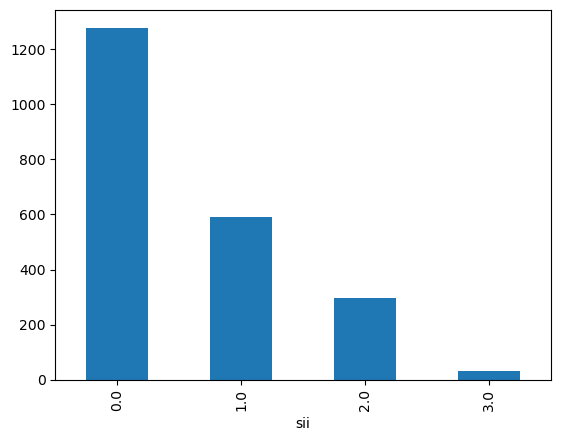

In [6]:
#First look at target variable.and

print(train['sii'].value_counts())
print(train['sii'].value_counts().plot(kind='bar'))

In [7]:
features_quant=['Physical-BMI','Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins',
       'PreInt_EduHx-computerinternet_hoursday']
train_quant=train[features_quant]


In [8]:
import seaborn as sns

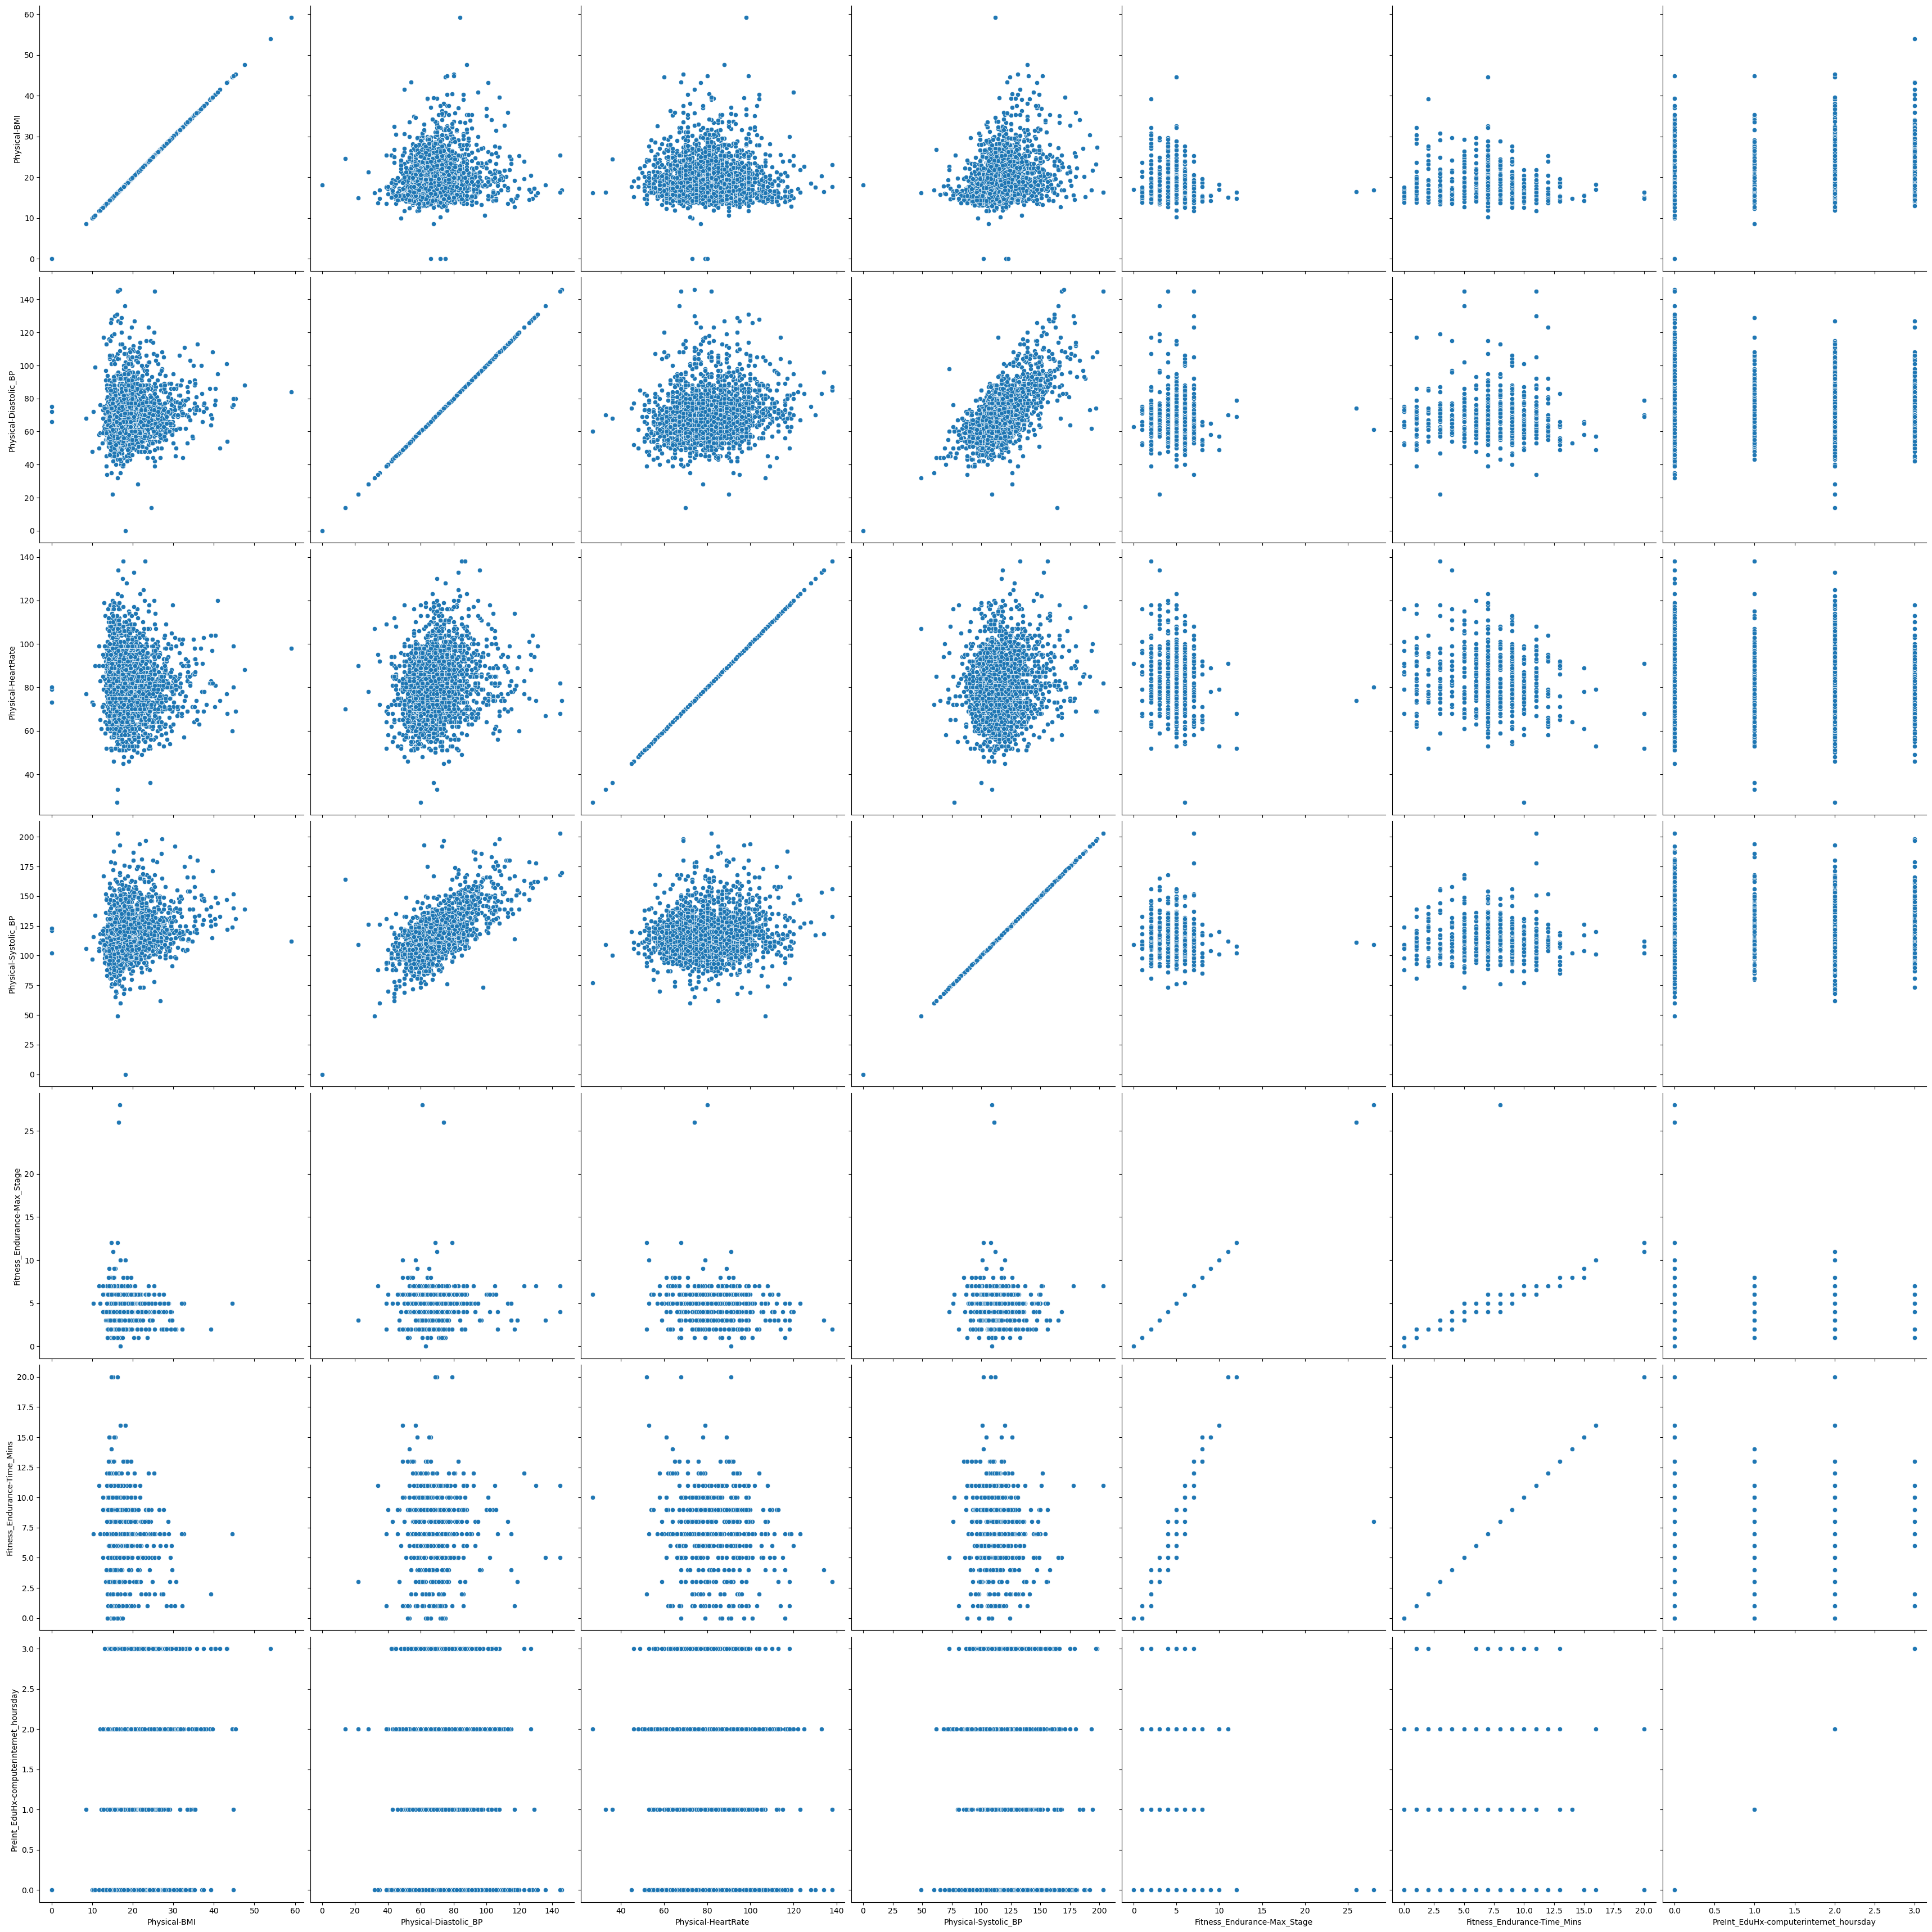

In [9]:
#A look at relationships between a few of the variables.

sns.pairplot(train_quant,
                height = 5,
                diag_kind = None)

plt.show()


The relationship between sii and the number of hours of internet usage per day. Note that "3.0" means three or more hours per day. There seems a clear trend that as sii rating increases, you are more likely to use the internet for more hours per day.


<Axes: xlabel='sii', ylabel='Count'>

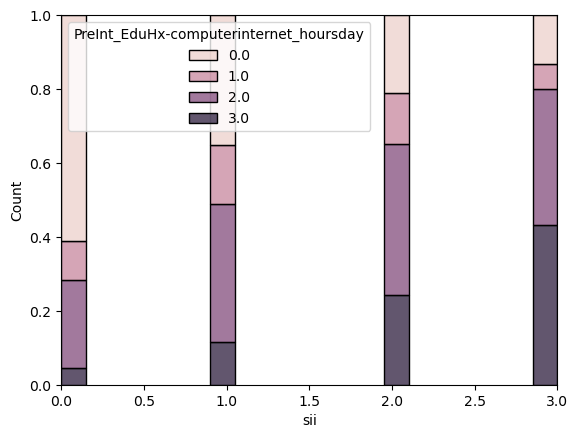

In [10]:
 sns.histplot(x = 'sii', hue ='PreInt_EduHx-computerinternet_hoursday', data = train,multiple = "fill")

The following plots show a variety of variables broken down by sii rating. All of them show some kind of variation across sii ratings, but maybe the most notable is for the endurance test variables and internet usage.


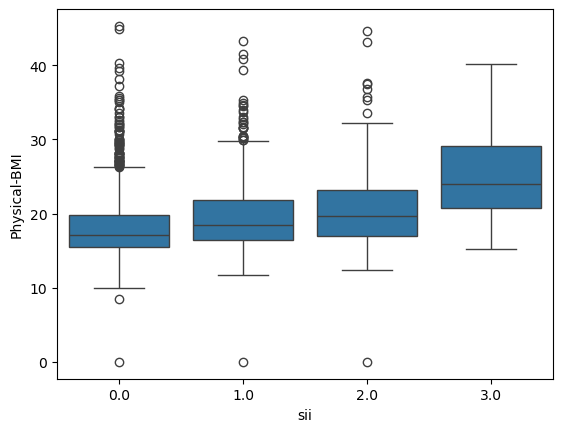

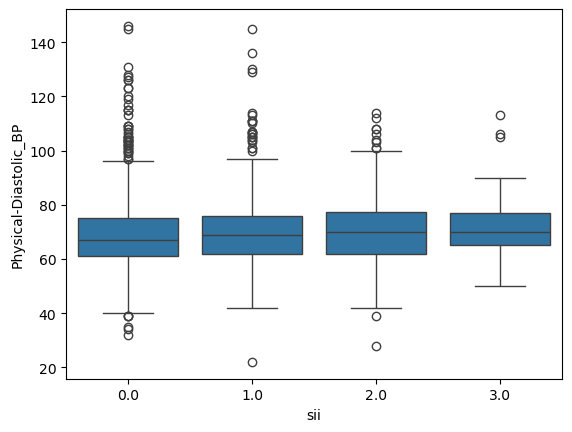

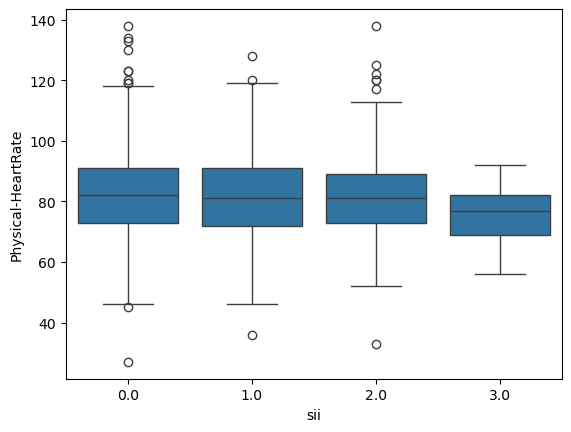

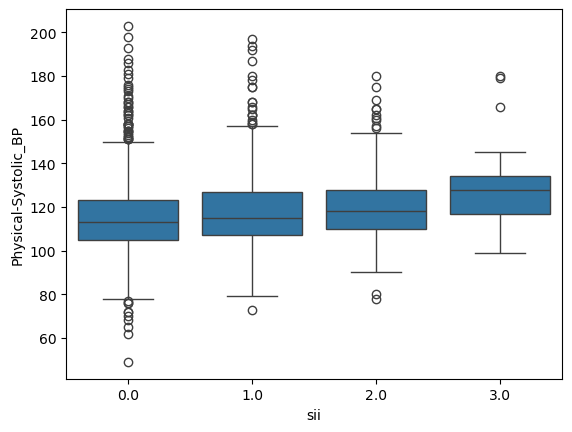

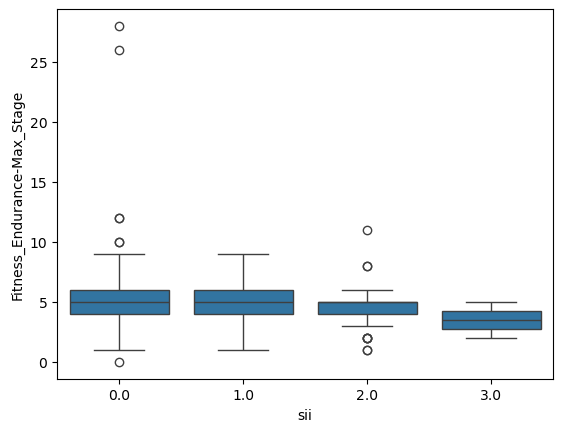

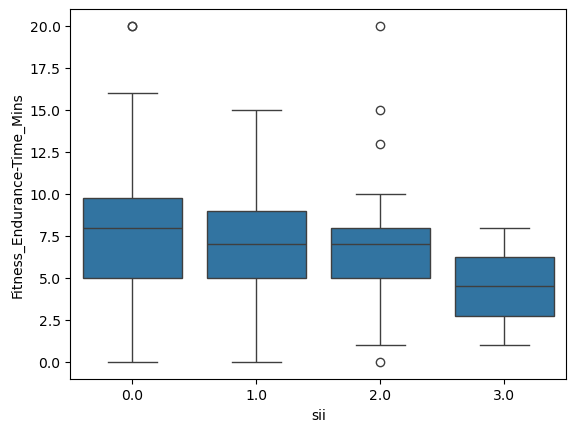

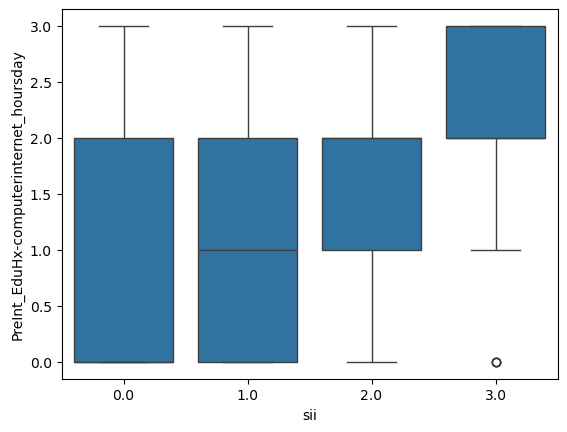

In [11]:
for i in range(len(features_quant)):
    sns.boxplot(x = 'sii',y=features_quant[i],
            data=train)
    plt.show()
    i+=1

Below, break down various variables by the season they are recorded. There doesn't seem to be a lot of variation by season in the outcomes, although there is some in some of the physical and fitness variables, with "healthier" outcomes corresponding to summer and fall.

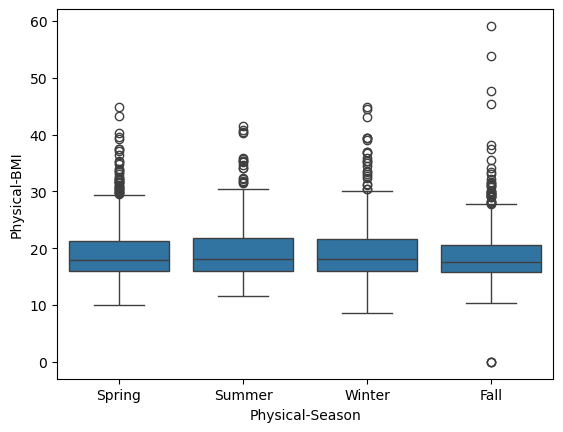

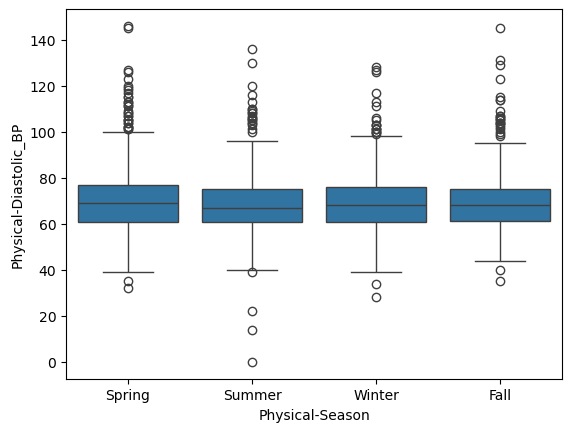

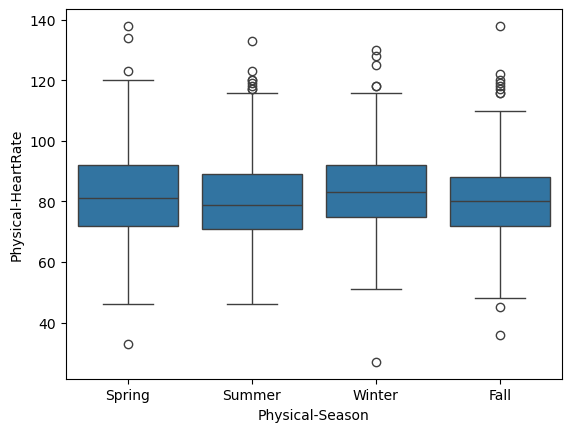

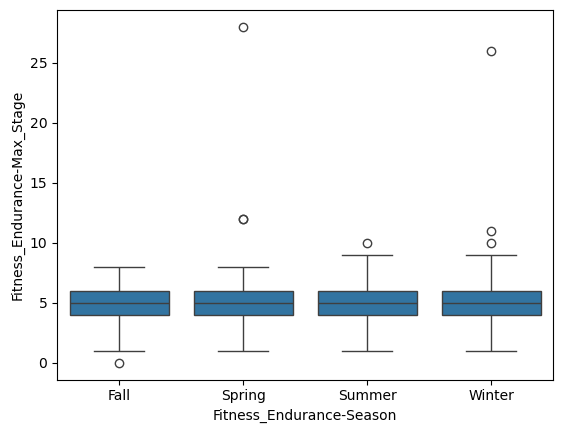

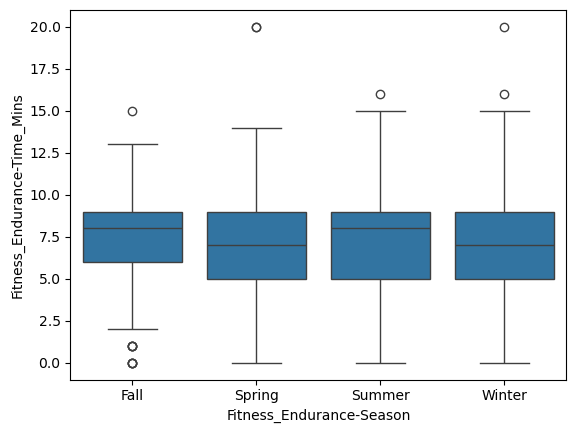

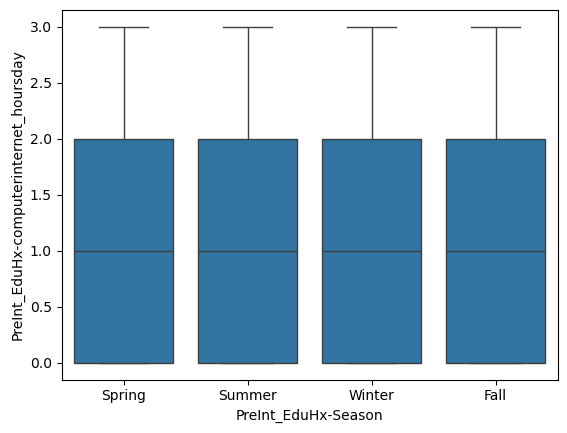

In [12]:
sns.boxplot(x = 'Physical-Season',y='Physical-BMI',
            data=train)
plt.show()

sns.boxplot(x = 'Physical-Season',y='Physical-Diastolic_BP',
            data=train)
plt.show()

sns.boxplot(x = 'Physical-Season',y='Physical-HeartRate',
            data=train)
plt.show()

sns.boxplot(x = 'Fitness_Endurance-Season',y='Fitness_Endurance-Max_Stage',
            data=train)
plt.show()

sns.boxplot(x = 'Fitness_Endurance-Season',y='Fitness_Endurance-Time_Mins',
            data=train)
plt.show()

sns.boxplot(x = 'PreInt_EduHx-Season',y='PreInt_EduHx-computerinternet_hoursday',
            data=train)
plt.show()

The various BIA measures don't seem to be useful for the purposes of the Child Mind Institute, but let's look at the relationship between these varibles and sii anyway. Note that there are some very extreme outliers in some of the data. It seems like these could be a measurement error?

In [13]:
features_BIA=['BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW']

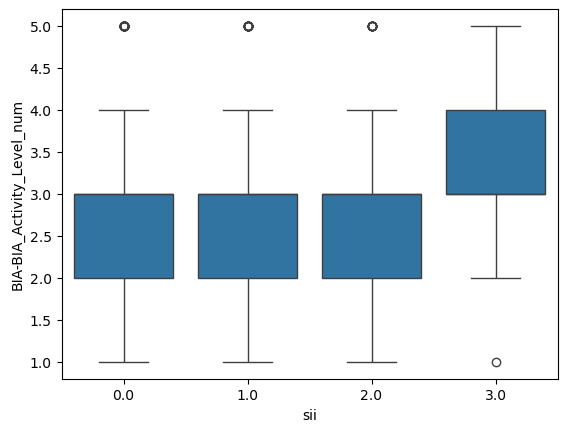

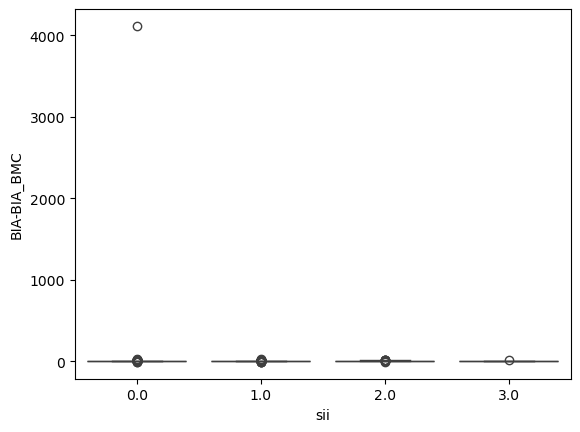

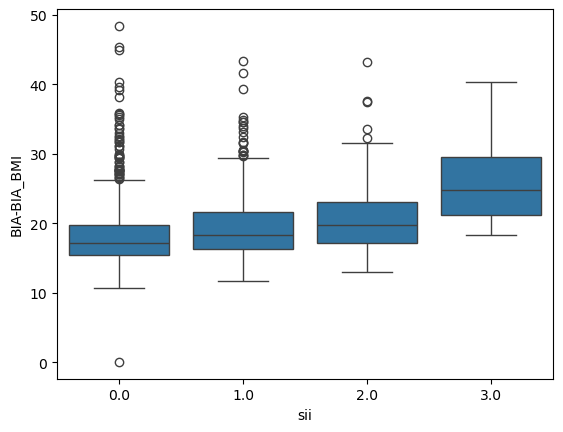

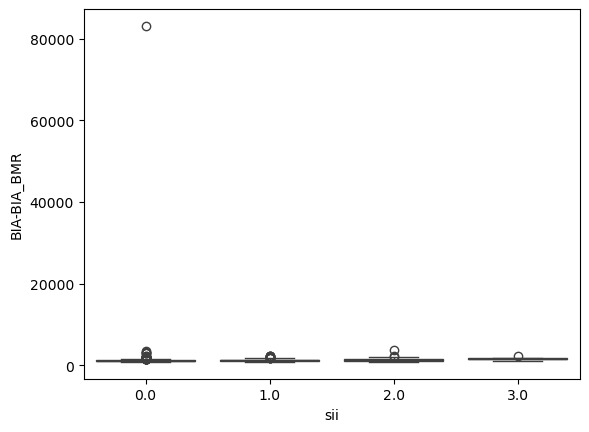

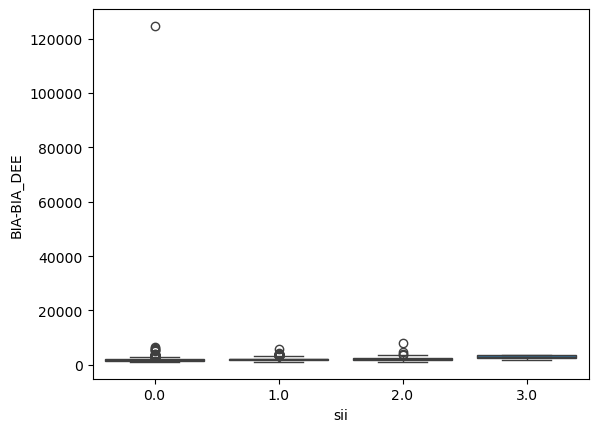

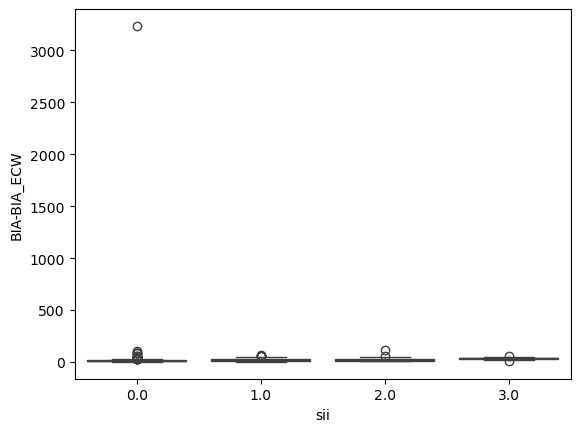

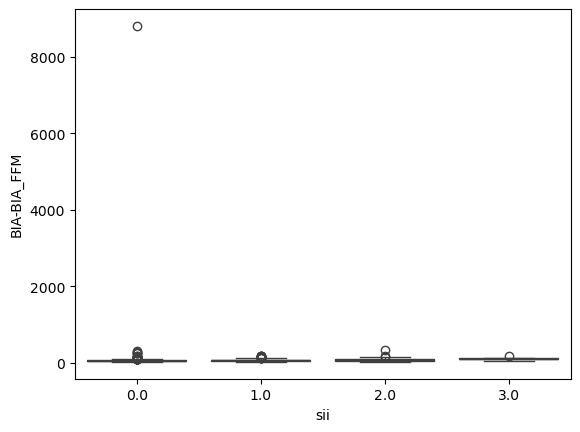

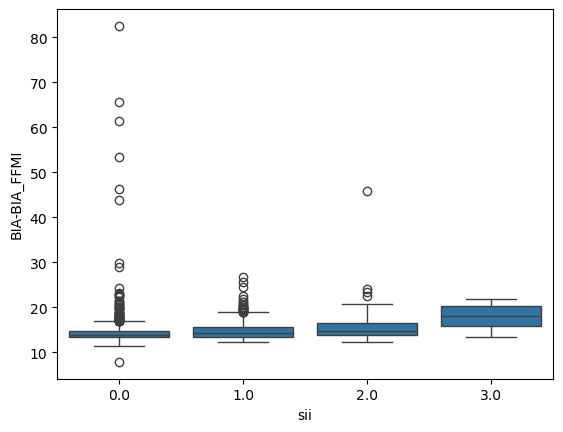

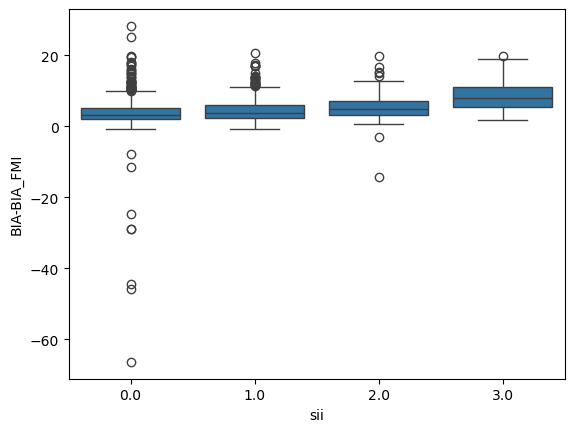

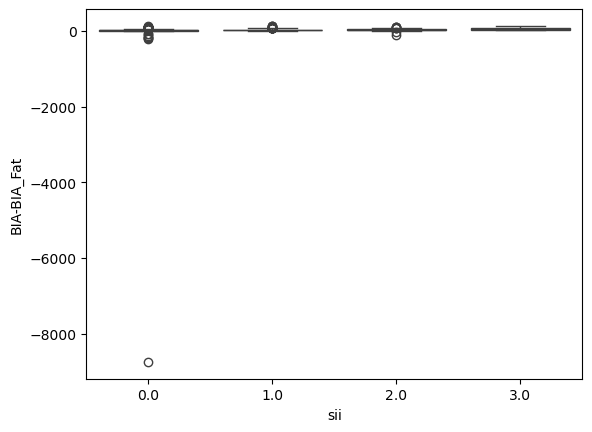

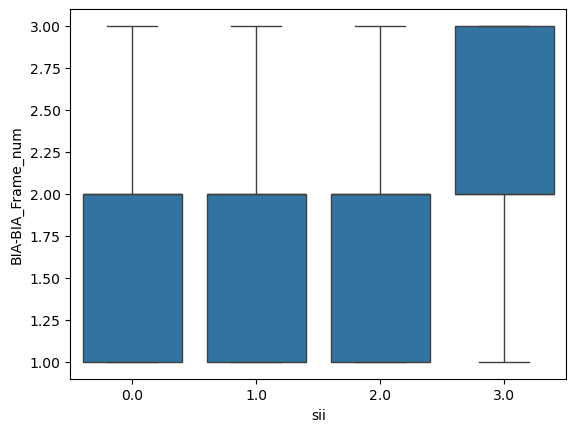

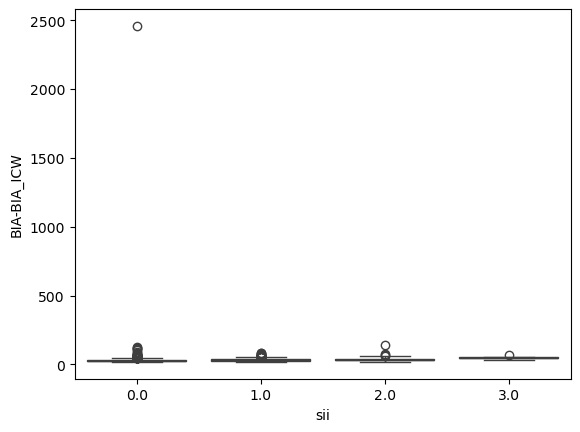

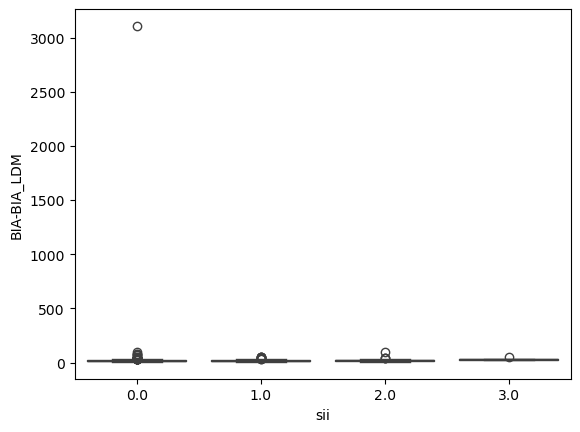

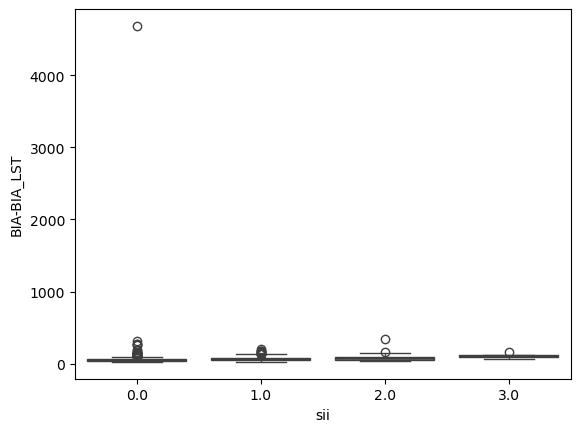

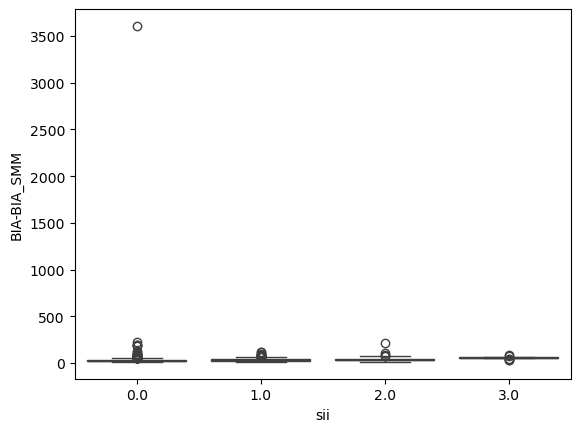

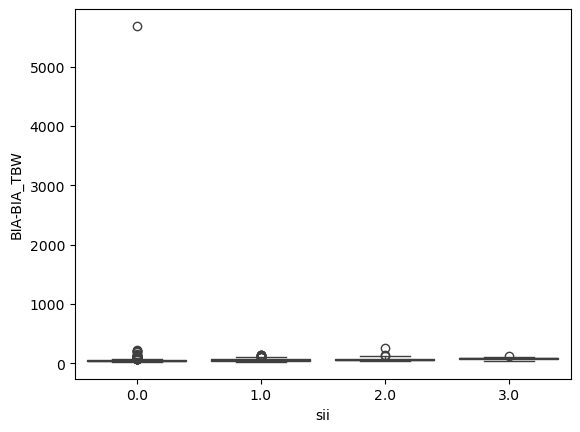

In [14]:
for i in range(len(features_BIA)):
    sns.boxplot(x = 'sii',y=features_BIA[i],
            data=train)
    plt.show()
    i+=1

To get a better visual sense if there is a relationship between sii and the various BIA variables, we define the following function which graphs all the data, and then regraphs with values above some threshhold eliminated.

In [15]:
def removal_box_plot(df, column, threshold,group):
    sns.boxplot(x=df[group],y=df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(x=removed_outliers[group],y=removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers



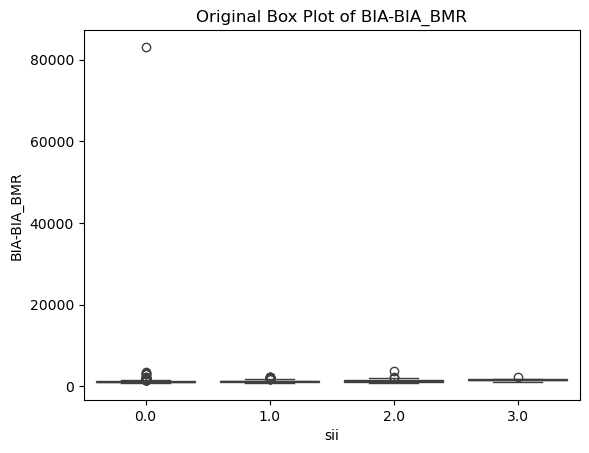

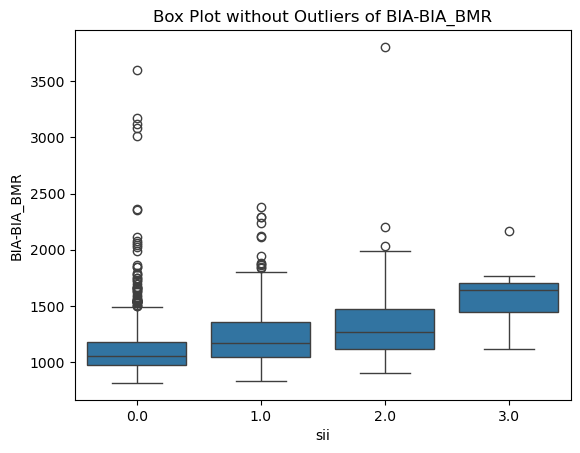

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,95488452,Spring,8,1,Summer,65.0,Spring,16.119083,52.00,62.0,...,0.0,0.0,0.0,0.0,Spring,31.0,45.0,Spring,0.0,0.0
6,bc0c0f03,Winter,8,0,Spring,81.0,Winter,14.839280,49.25,51.2,...,1.0,0.0,0.0,24.0,Winter,32.0,46.0,Winter,2.0,0.0
8,058990e9,Summer,10,0,Winter,41.0,Fall,14.992134,53.57,61.2,...,5.0,5.0,1.0,44.0,Fall,57.0,79.0,Summer,1.0,1.0
10,52bd147c,Winter,5,0,Summer,71.0,Spring,14.266191,43.50,38.4,...,2.0,0.0,0.0,10.0,Summer,29.0,42.0,Winter,2.0,0.0
11,d565ccf6,Spring,8,0,Summer,62.0,Spring,16.698133,49.50,58.2,...,2.0,1.0,1.0,30.0,Summer,49.0,68.0,Spring,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,1cf6dcef,Winter,7,1,Spring,65.0,Spring,18.083368,44.00,49.8,...,4.0,3.0,0.0,38.0,Spring,36.0,51.0,Winter,2.0,1.0
3163,eaedb188,Fall,10,1,Winter,75.0,Winter,17.718711,52.70,70.0,...,0.0,0.0,0.0,24.0,Winter,51.0,71.0,Fall,0.0,0.0
3164,34c30fad,Winter,19,1,NaN,NaN,Spring,28.321086,64.50,167.6,...,0.0,5.0,5.0,78.0,NaN,NaN,NaN,Winter,3.0,2.0
3165,c97a40fe,Summer,8,0,NaN,NaN,Summer,14.384608,47.00,45.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,0.0,NaN


In [16]:
threshold_value =8000
removal_box_plot(train, 'BIA-BIA_BMR', threshold_value,'sii')

In [17]:
for i in range(len(features_BIA)):
    print(train.groupby('sii')[features_BIA[i]].mean())
    i+=1

sii
0.0    2.645614
1.0    2.739583
2.0    2.739796
3.0    3.238095
Name: BIA-BIA_Activity_Level_num, dtype: float64
sii
0.0    9.092587
1.0    4.482140
2.0    4.658186
3.0    6.083430
Name: BIA-BIA_BMC, dtype: float64
sii
0.0    18.438568
1.0    19.661364
2.0    20.751776
3.0    26.689638
Name: BIA-BIA_BMI, dtype: float64
sii
0.0    1215.400600
1.0    1231.485951
2.0    1318.226714
3.0    1589.724762
Name: BIA-BIA_BMR, dtype: float64
sii
0.0    2013.677205
1.0    2092.045885
2.0    2248.734184
3.0    2890.232381
Name: BIA-BIA_DEE, dtype: float64
sii
0.0    20.036716
1.0    20.672863
2.0    23.961593
3.0    34.862848
Name: BIA-BIA_ECW, dtype: float64
sii
0.0     71.719152
1.0     73.432458
2.0     82.671493
3.0    111.589514
Name: BIA-BIA_FFM, dtype: float64
sii
0.0    14.658704
1.0    14.866262
2.0    15.451153
3.0    17.905448
Name: BIA-BIA_FFMI, dtype: float64
sii
0.0    3.779863
1.0    4.795105
2.0    5.300627
3.0    8.784188
Name: BIA-BIA_FMI, dtype: float64
sii
0.0     6.735083
1

In [18]:
train['sii'].describe()

count    2195.000000
mean        0.579954
std         0.772333
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: sii, dtype: float64

In [19]:
print(train.groupby('sii')['Basic_Demos-Sex'].value_counts())
print(train.groupby('Basic_Demos-Sex')['sii'].describe())

sii  Basic_Demos-Sex
0.0  0                  762
     1                  517
1.0  0                  384
     1                  205
2.0  0                  214
     1                   83
3.0  0                   23
     1                    7
Name: count, dtype: int64
                  count      mean       std  min  25%  50%  75%  max
Basic_Demos-Sex                                                     
0                1383.0  0.637021  0.800590  0.0  0.0  0.0  1.0  3.0
1                 812.0  0.482759  0.711677  0.0  0.0  0.0  1.0  3.0


Next I am going to work on identifying outliers.

In [20]:
print(len(train.columns))
#z=train
z=np.abs(stats.zscore(train[['BIA-BIA_BMC']],nan_policy='omit'))
print(z.describe())
threshold = 10
indices = np.where(np.all(z > threshold, axis=1))[0]
indices


82
       BIA-BIA_BMC
count  1593.000000
mean      0.055038
std       0.998798
min       0.000010
25%       0.019167
50%       0.031064
75%       0.039877
max      39.888718


array([2966])

In [21]:
train

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,95488452,Spring,8,1,Summer,65.0,Spring,16.119083,52.0,62.0,...,0.0,0.0,0.0,0.0,Spring,31.0,45.0,Spring,0.0,0.0
1,8e0b739c,Summer,10,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,NaN,NaN
2,0e64e5ef,Summer,9,1,NaN,NaN,Summer,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,d1aafc4e,Winter,12,0,NaN,NaN,Summer,NaN,NaN,0.0,...,2.0,2.0,1.0,39.0,Spring,48.0,67.0,Winter,2.0,1.0
4,97ac1b72,Summer,6,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,eaedb188,Fall,10,1,Winter,75.0,Winter,17.718711,52.7,70.0,...,0.0,0.0,0.0,24.0,Winter,51.0,71.0,Fall,0.0,0.0
3164,34c30fad,Winter,19,1,NaN,NaN,Spring,28.321086,64.5,167.6,...,0.0,5.0,5.0,78.0,NaN,NaN,NaN,Winter,3.0,2.0
3165,c97a40fe,Summer,8,0,NaN,NaN,Summer,14.384608,47.0,45.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,0.0,NaN
3166,1bc6a98c,Winter,7,0,Summer,64.0,Winter,14.320960,47.0,45.0,...,0.0,0.0,0.0,0.0,Winter,39.0,55.0,Winter,0.0,0.0


In [22]:
print(train['BIA-BIA_BMC'].iloc[[3205]])

IndexError: positional indexers are out-of-bounds

In [ ]:
#Identify the float columns for the data frame.train

float_columns = train.select_dtypes(include=['float']).columns
print("Float columns:", float_columns)
print(len(float_columns))
float_columns[2]

Float columns: Index(['CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight',
       'Physical-Waist_Circumference', 'Physical-Diastolic_BP',
       'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins',
       'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone',
       'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone',
       'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone',
       'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'PAQ_A-PAQ_A_Total', 'PAQ_C-PAQ_C_Total',
       'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04',
  

'Physical-Height'

In [ ]:
index_set=[]
for i in range(len(float_columns)):
    #print(float_columns[i])
    z=np.abs(stats.zscore(train[[float_columns[i]]],nan_policy='omit'))
    #print(z.describe())
    threshold = 10
    indices = np.where(np.all(z > threshold, axis=1))[0].flatten().tolist()
    index_set=index_set+indices
    print(indices)
    i+=1

index_set=list(set(index_set))
index_set

[2065]
[]
[]
[]
[]
[]
[]
[]
[1470, 3767]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[3205]
[]
[3205]
[3205]
[3205]
[3205]
[3147, 3511]
[3147, 3511]
[3205]
[]
[3205]
[3205]
[3205]
[3205]
[3205]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


[3511, 3205, 3147, 2065, 3767, 1470]

In [ ]:
train_no_outliers=train.drop(index_set)
len(train_no_outliers)

3954

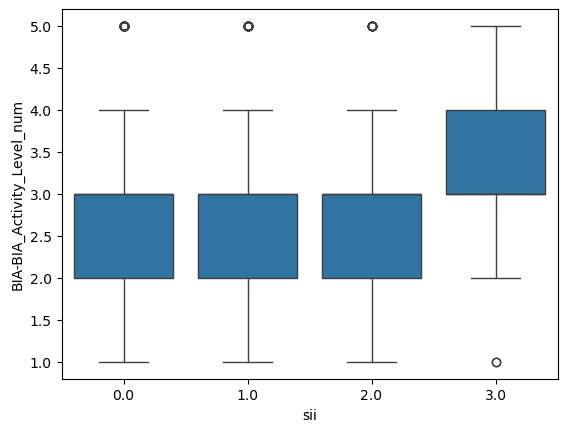

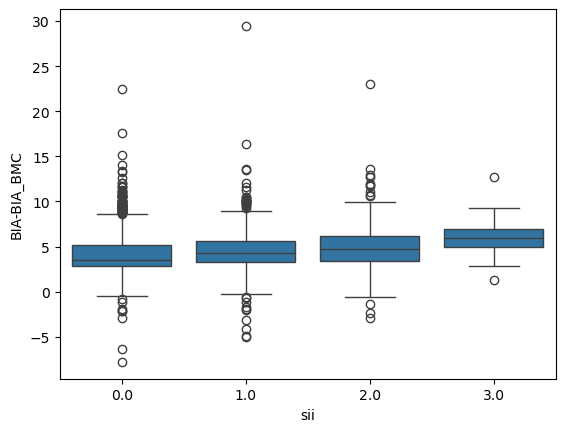

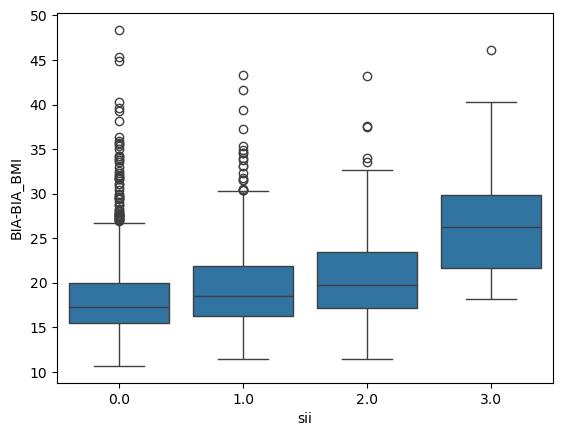

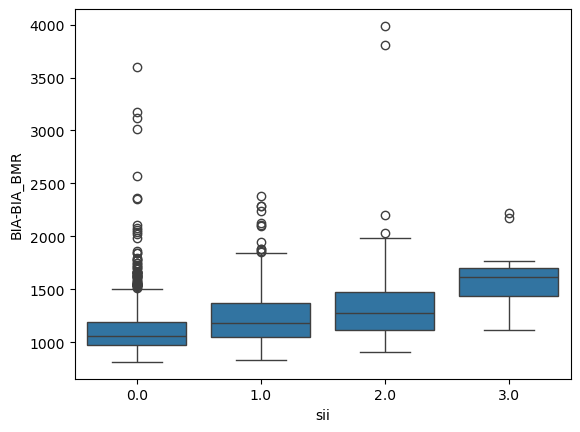

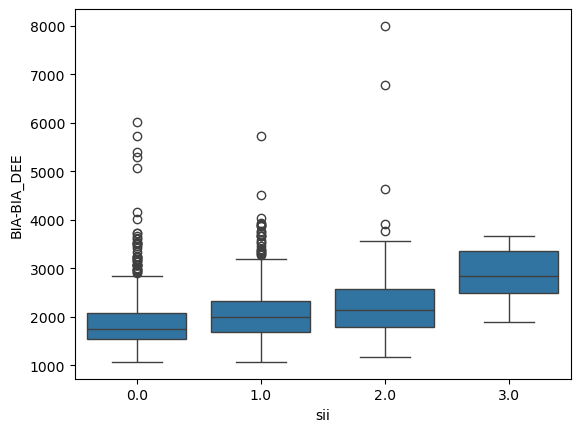

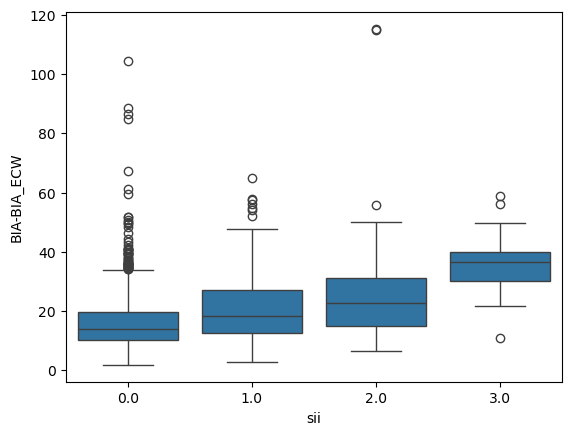

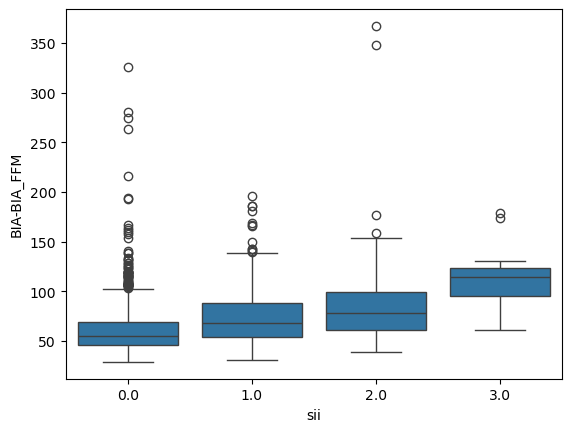

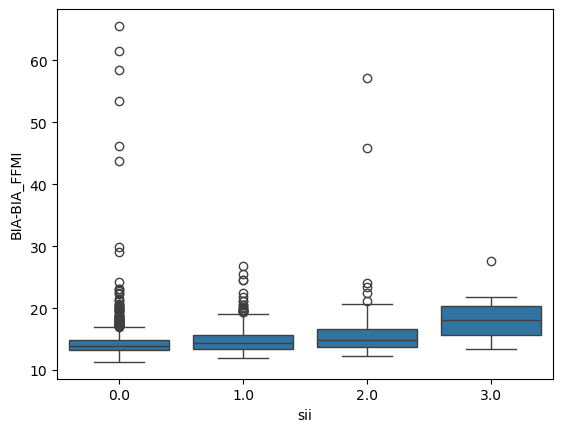

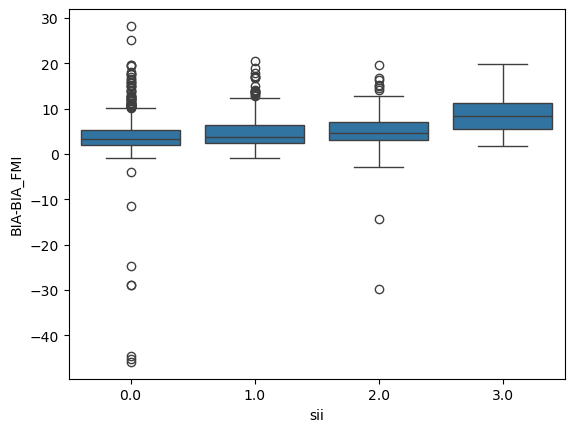

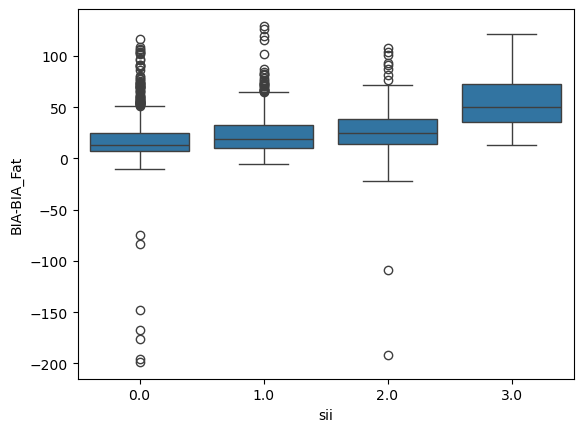

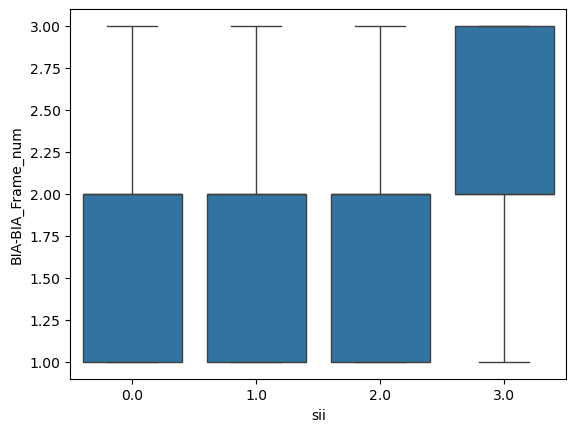

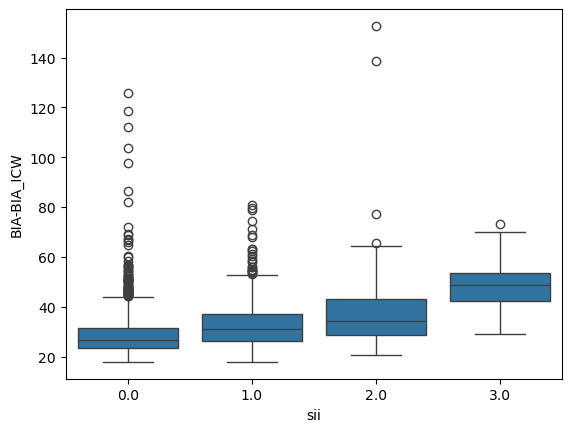

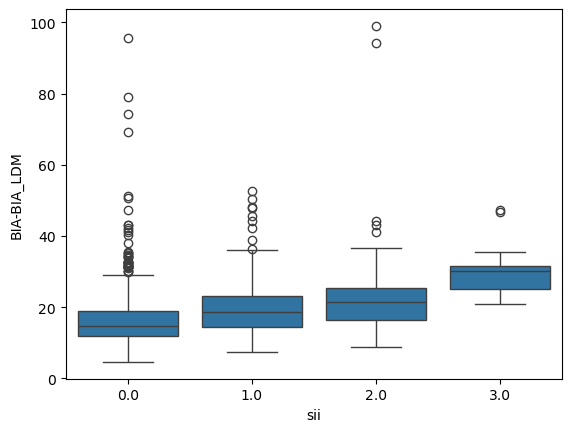

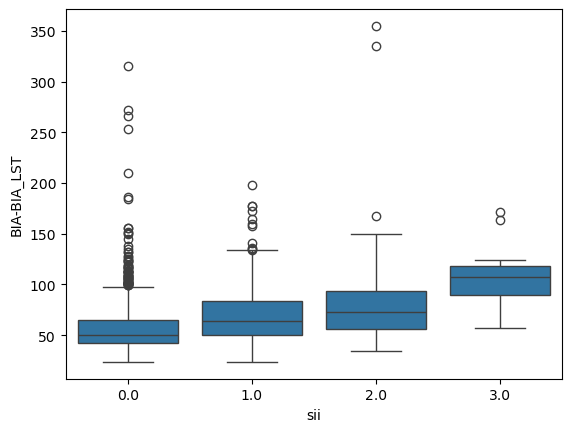

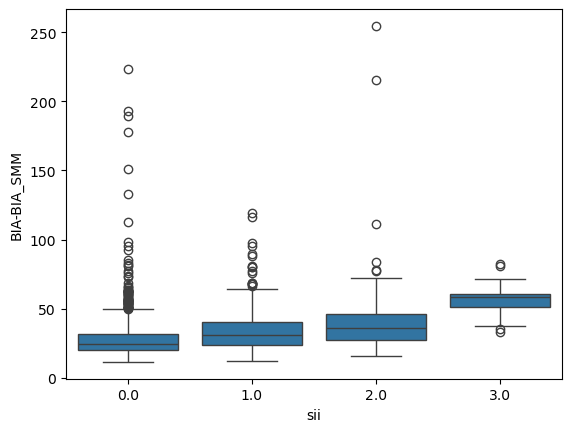

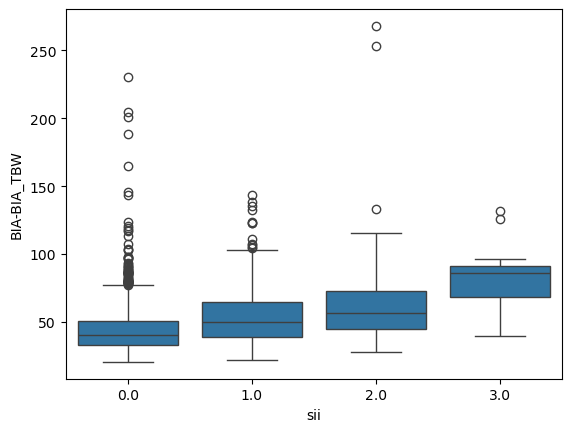

In [ ]:
for i in range(len(features_BIA)):
    sns.boxplot(x = 'sii',y=features_BIA[i],
            data=train_no_outliers)
    plt.show()
    i+=1

In [ ]:
features_quant=['Basic_Demos-Age','CGAS-CGAS_Score', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU', 'FGC-FGC_GSND',
       'FGC-FGC_GSD', 'FGC-FGC_PU', 'FGC-FGC_SRL', 'FGC-FGC_SRR', 'FGC-FGC_TL',
       'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'PAQ_A-PAQ_A_Total',
       'PAQ_C-PAQ_C_Total','PCIAT-PCIAT_01', 'PCIAT-PCIAT_02',
       'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
       'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10',
       'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12', 'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14',
       'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16', 'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18',
       'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20', 'PCIAT-PCIAT_Total',
       'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T']

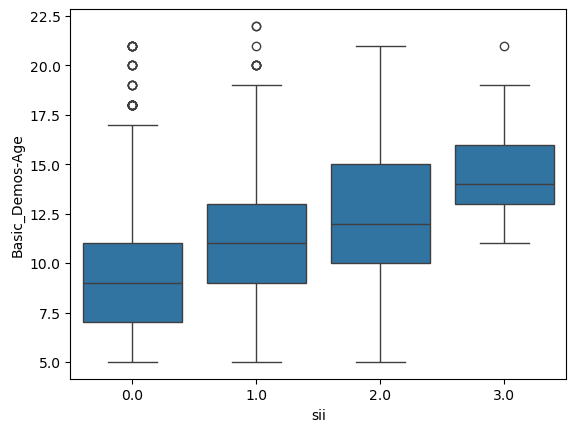

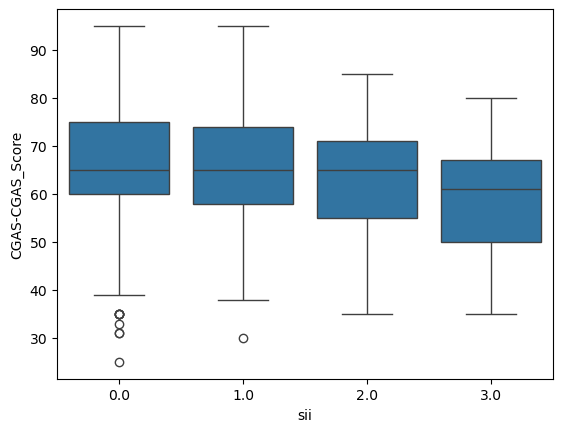

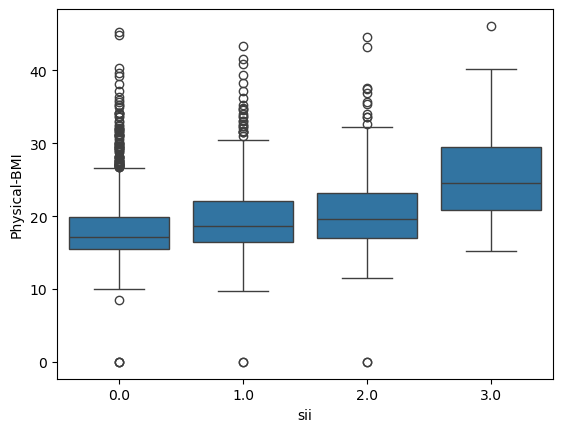

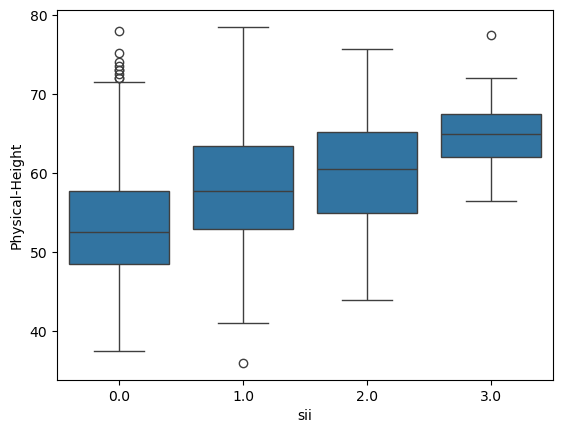

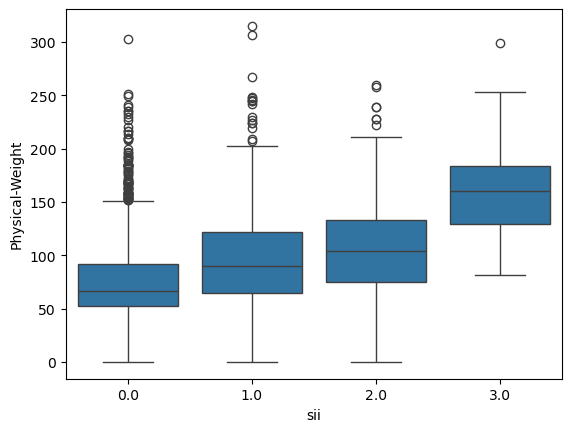

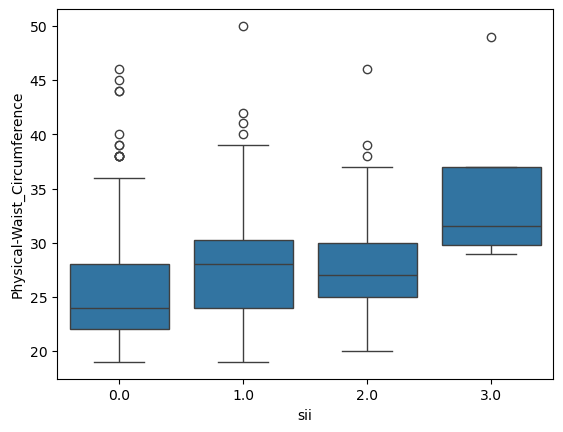

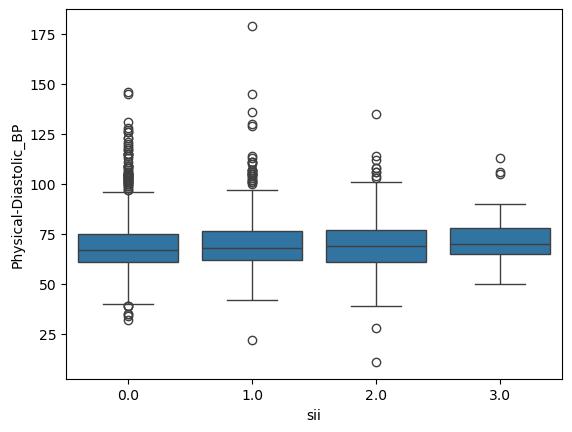

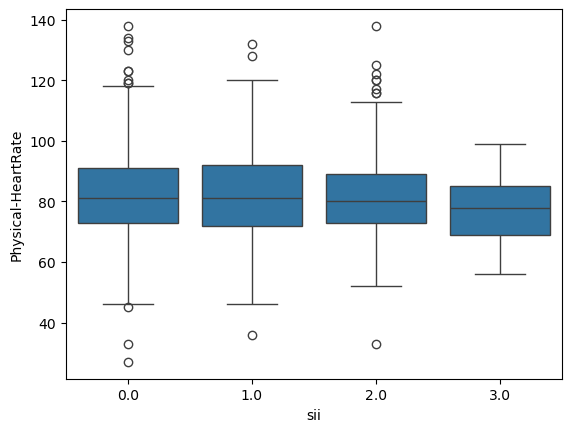

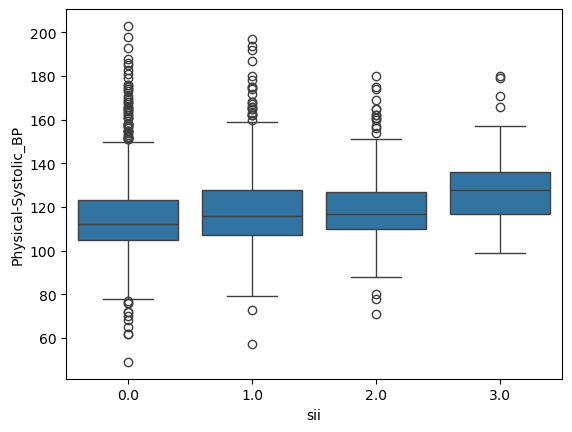

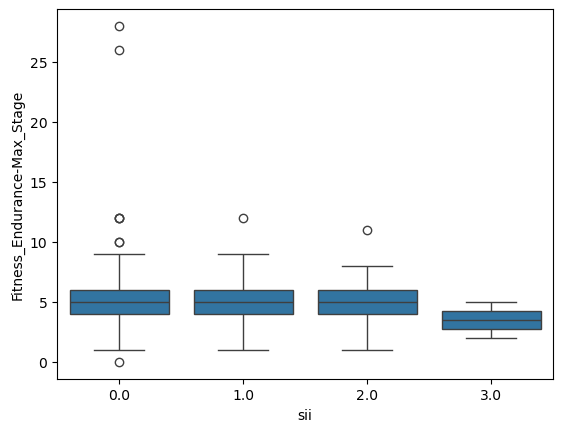

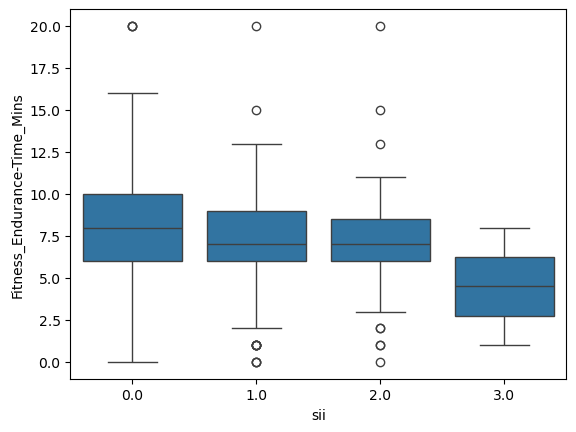

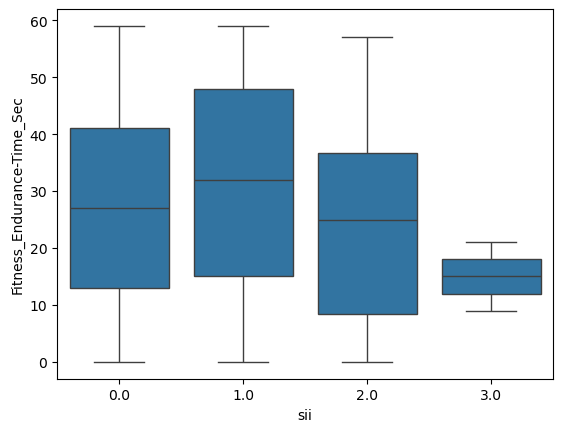

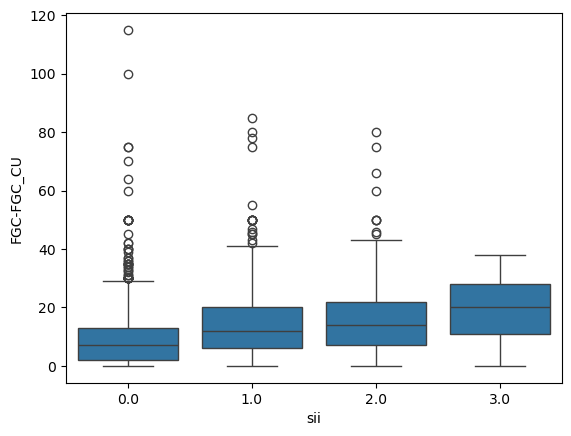

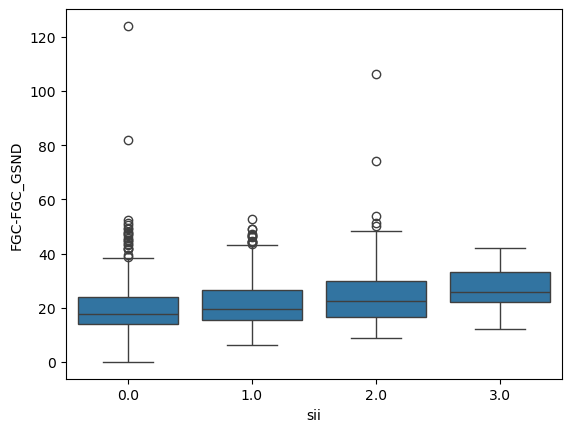

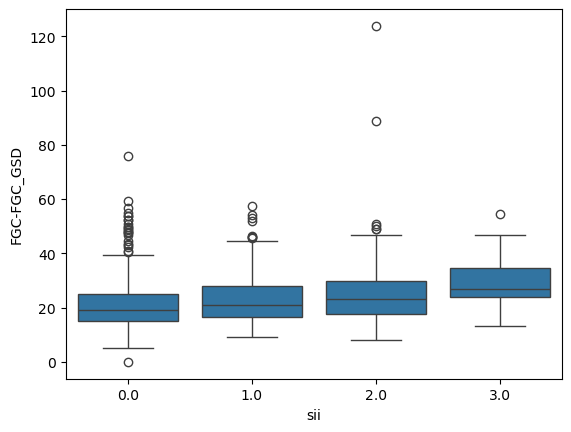

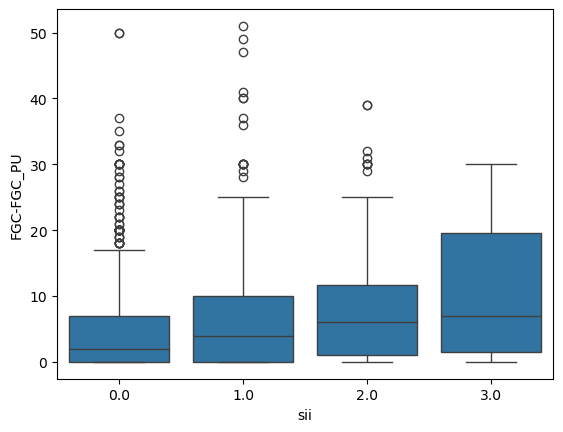

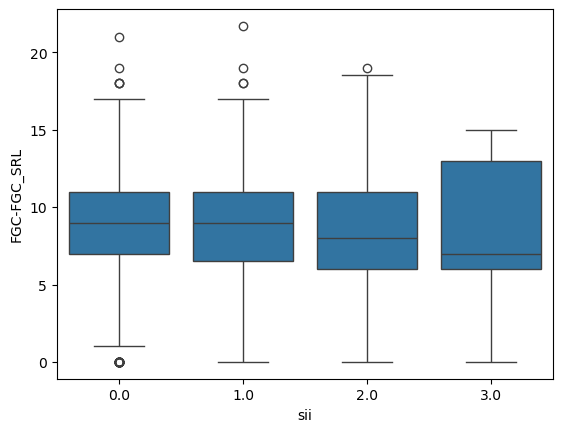

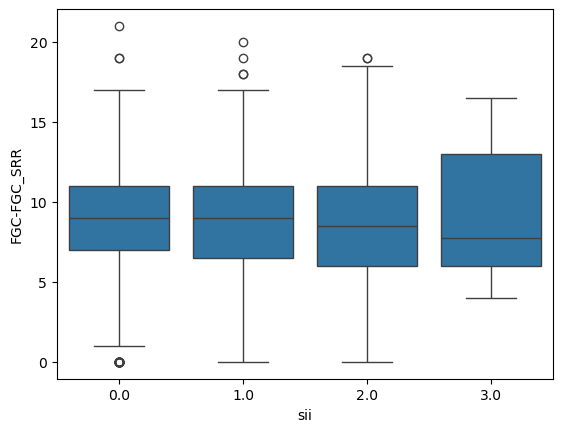

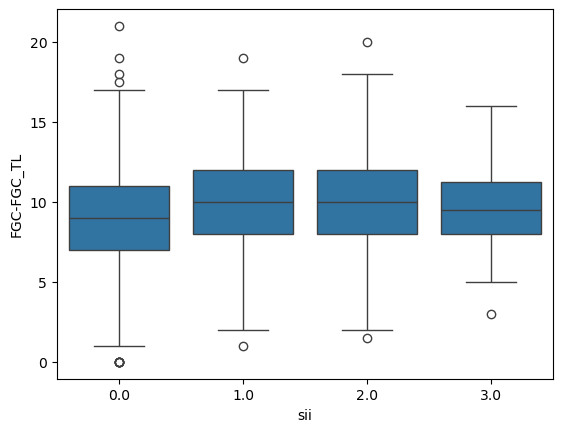

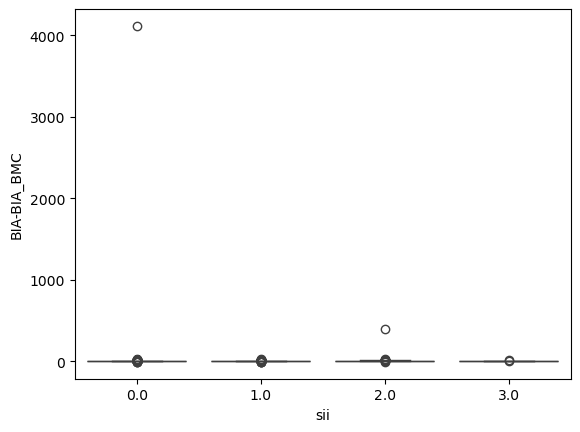

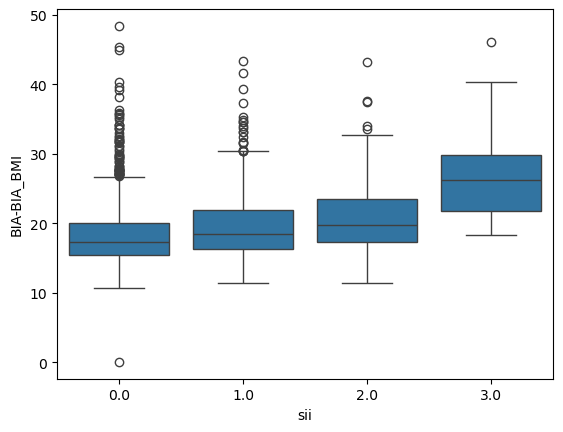

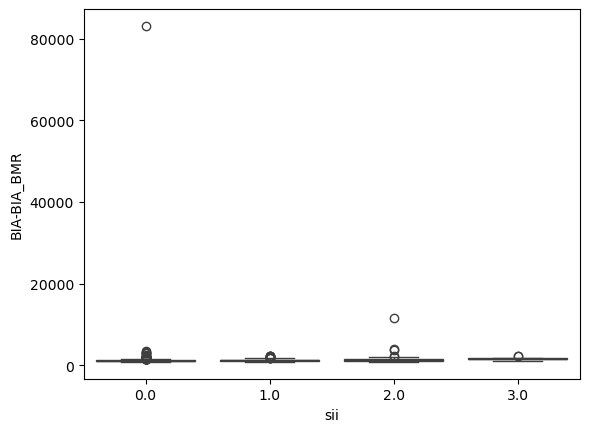

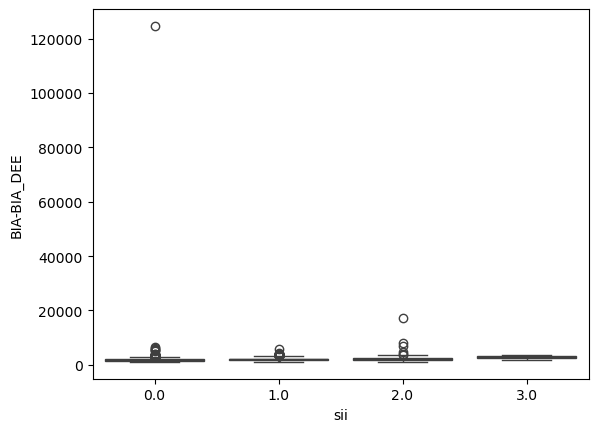

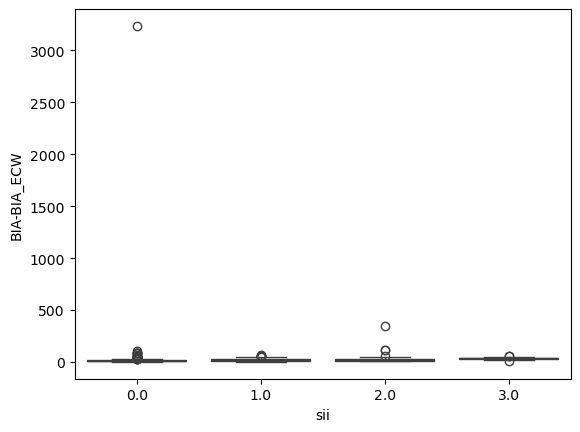

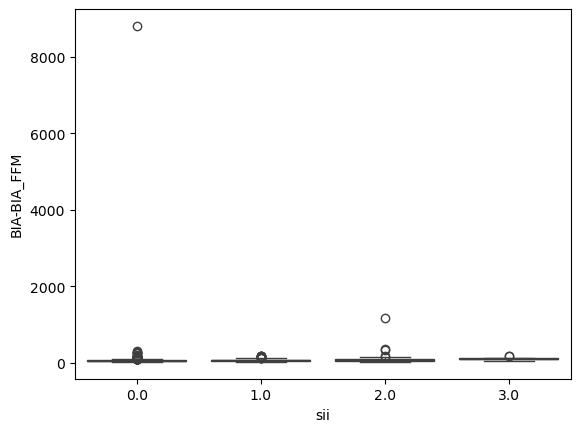

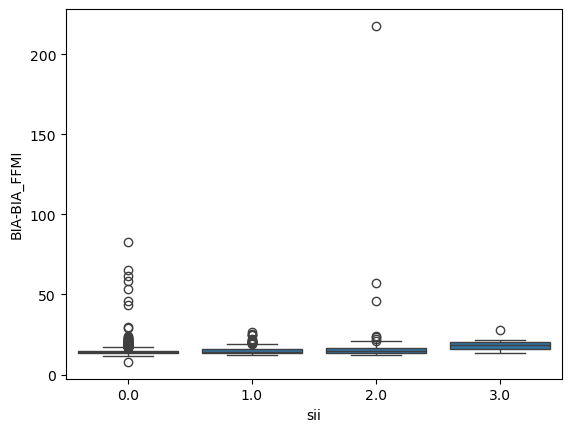

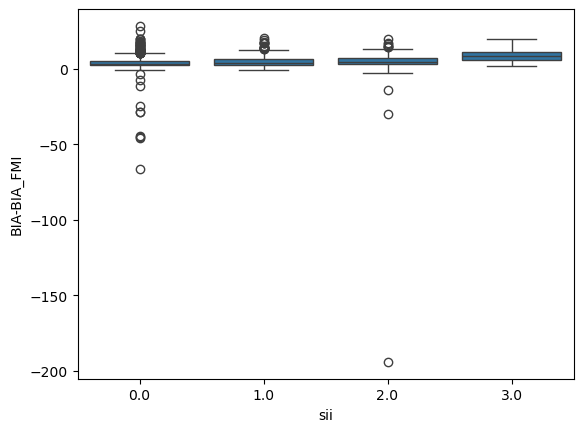

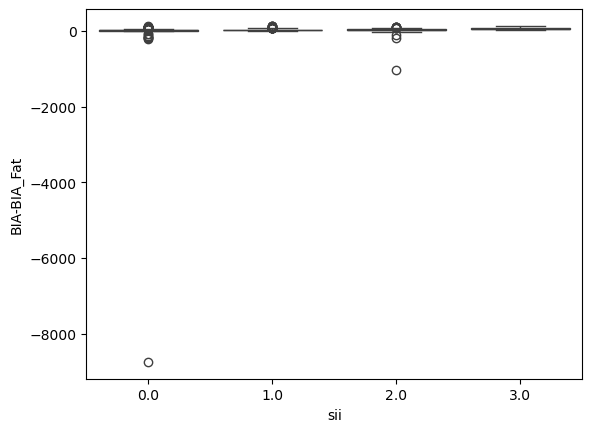

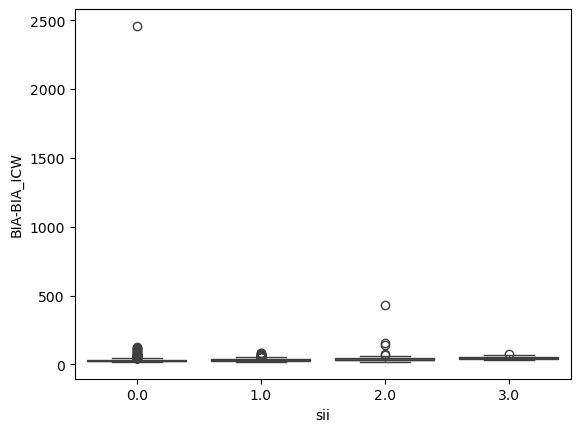

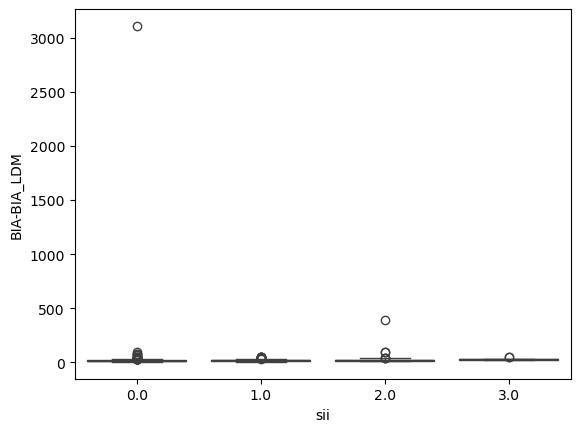

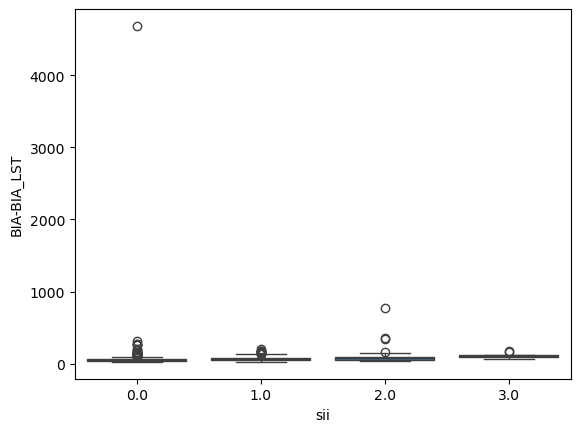

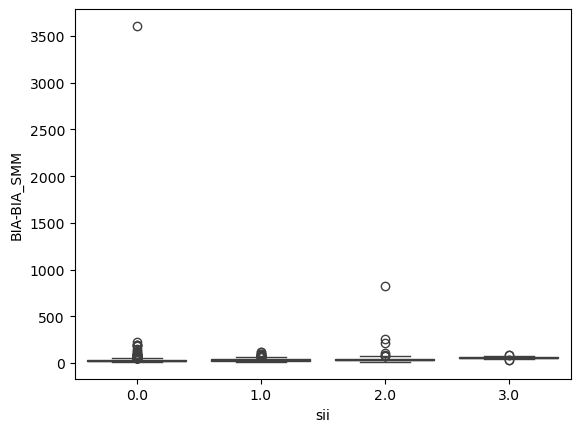

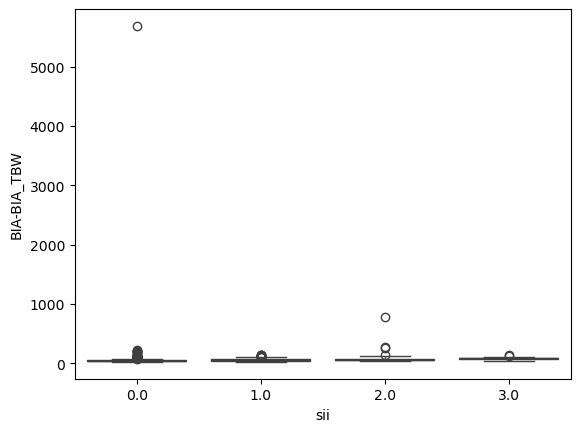

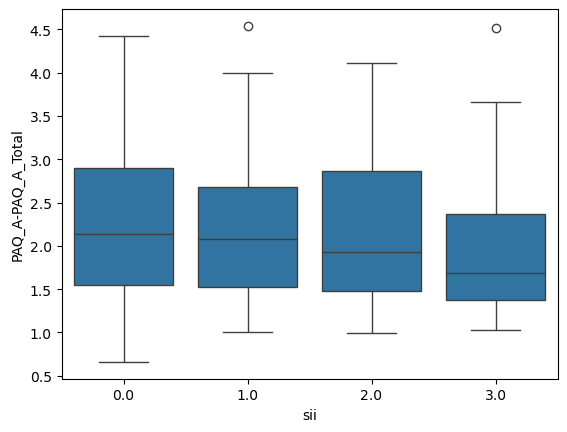

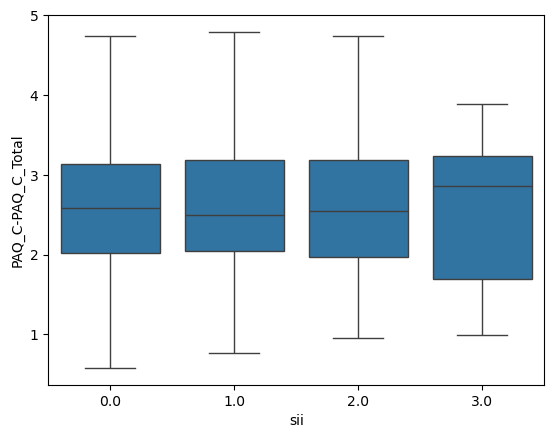

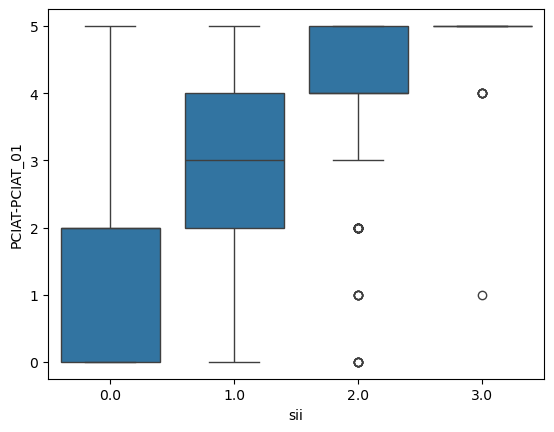

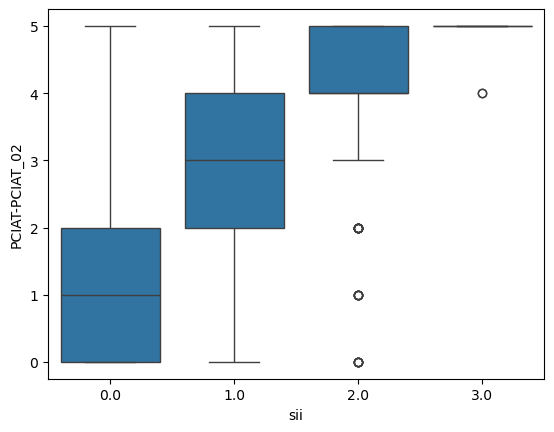

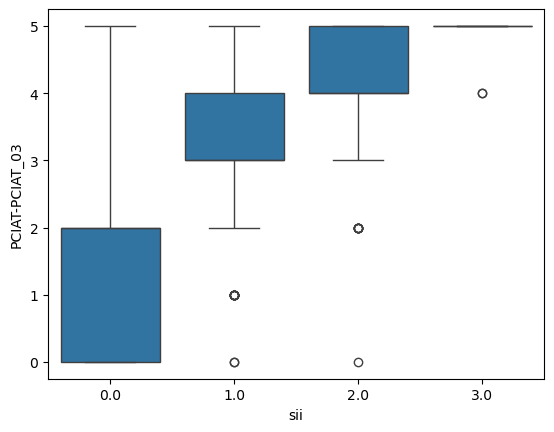

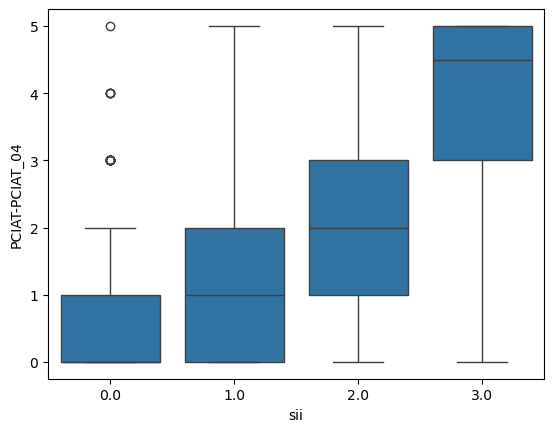

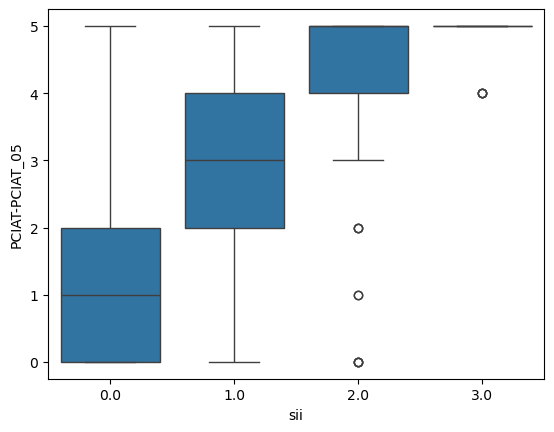

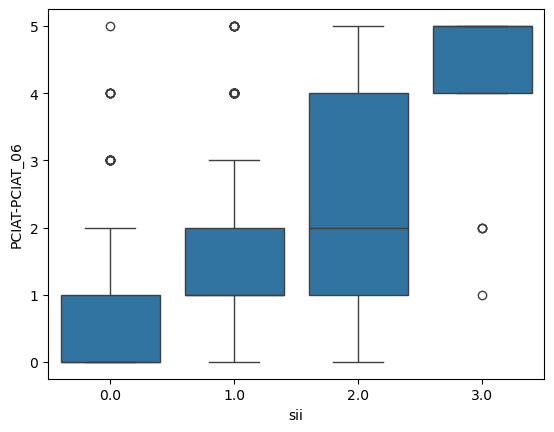

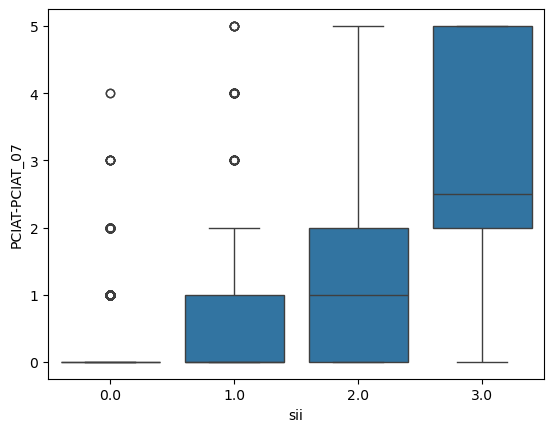

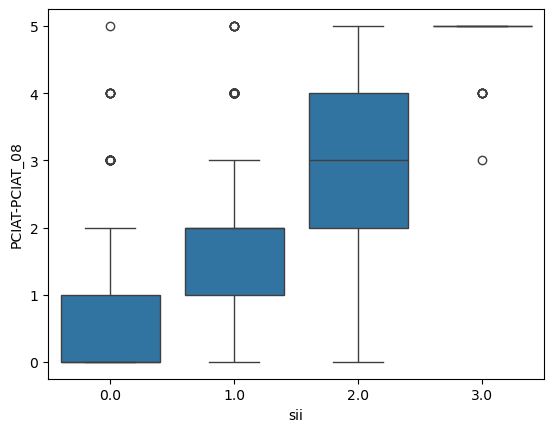

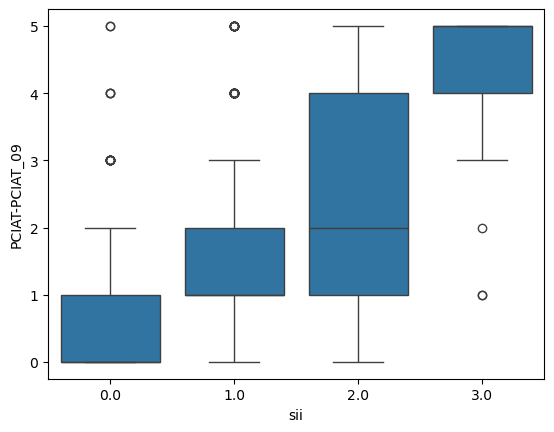

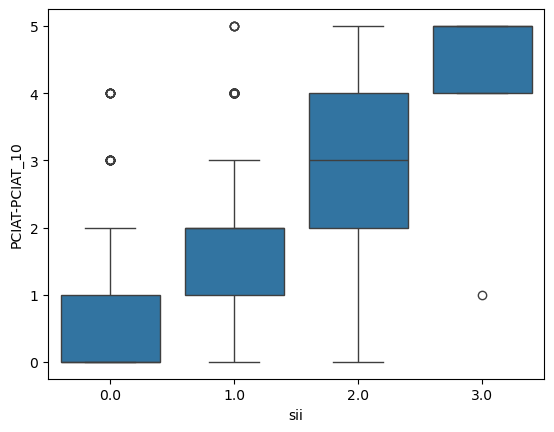

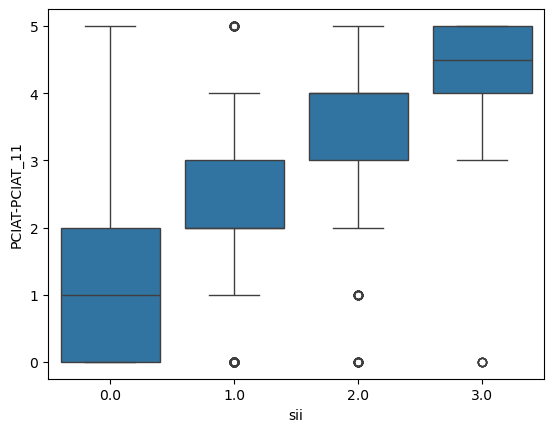

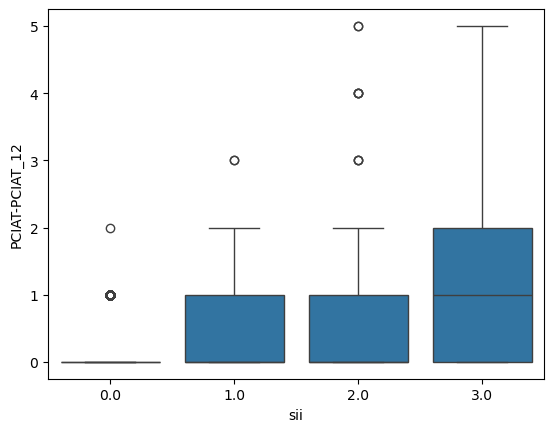

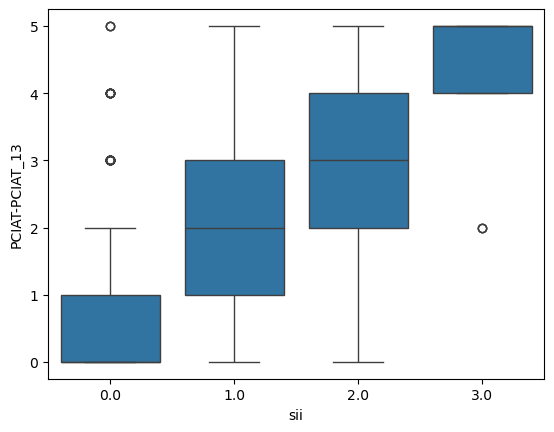

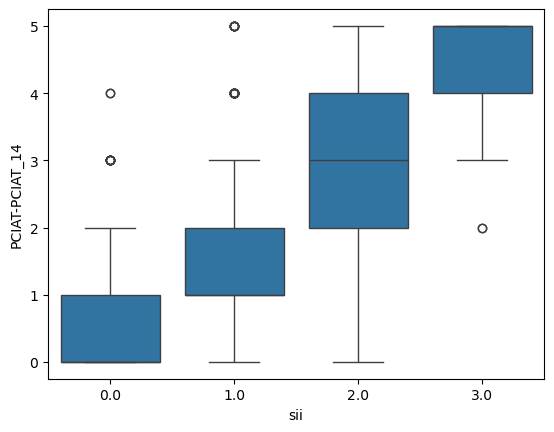

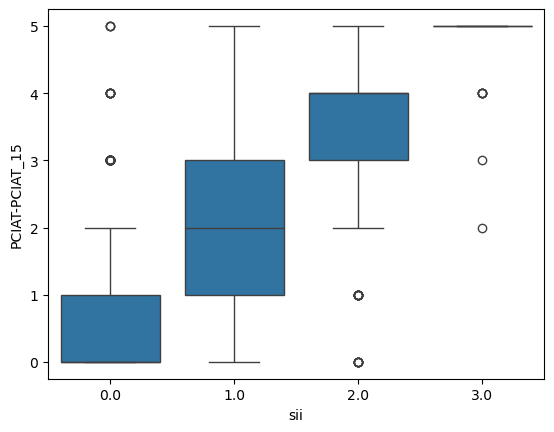

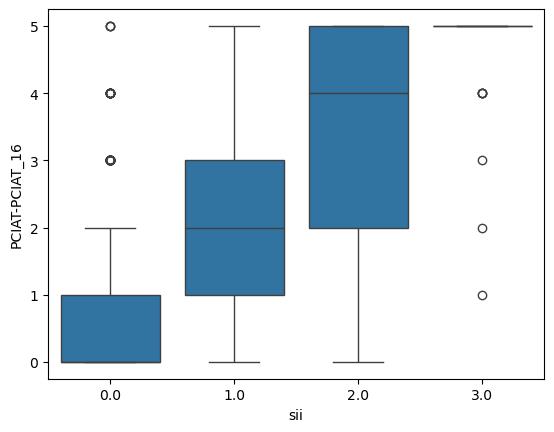

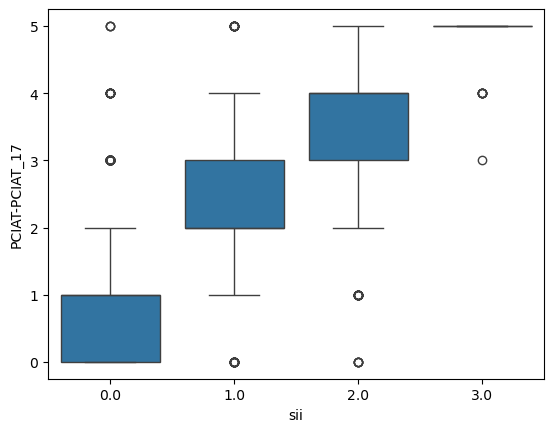

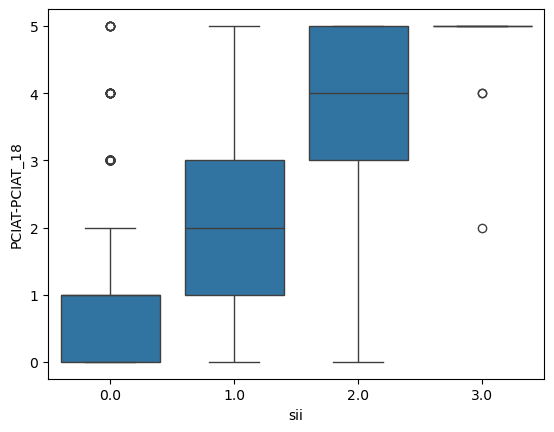

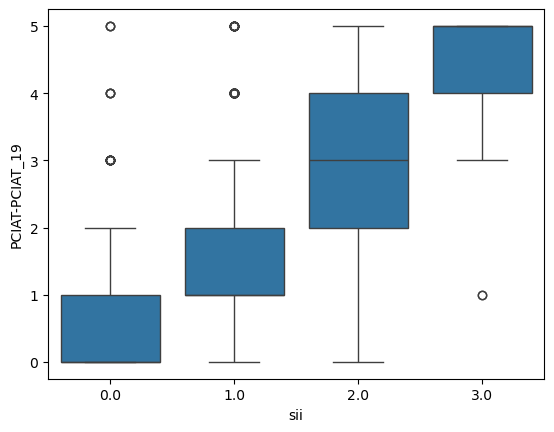

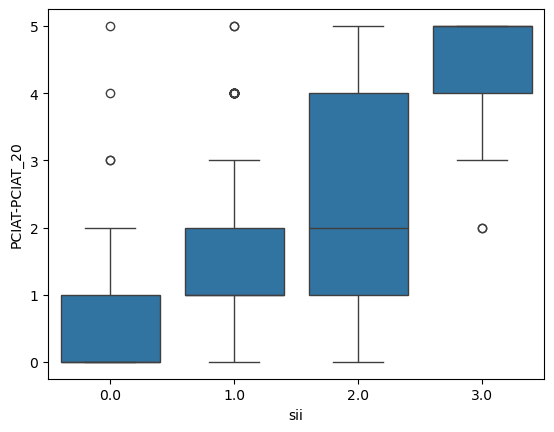

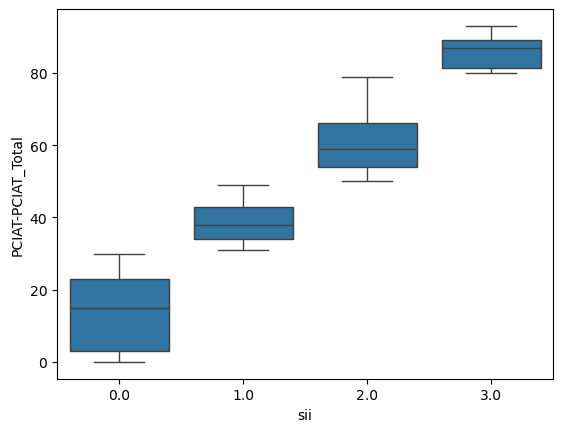

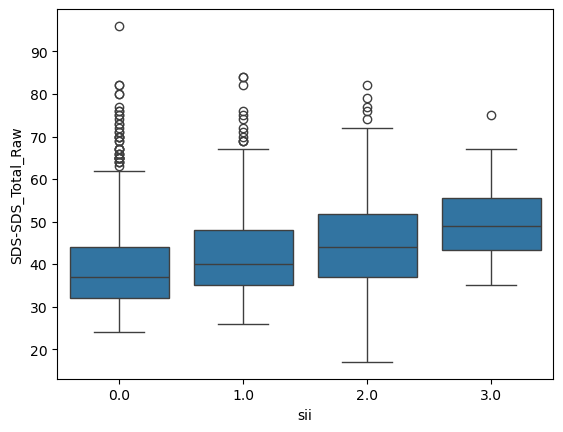

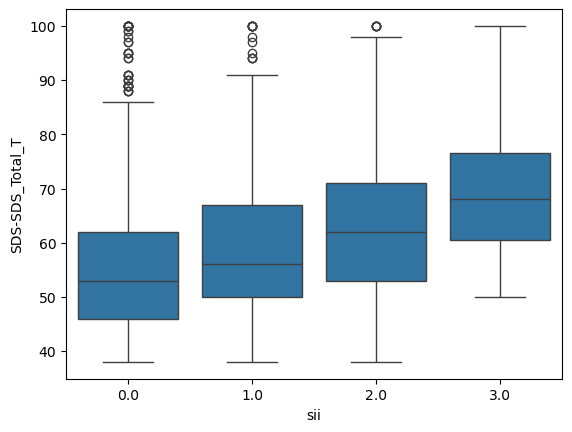

In [ ]:
for i in range(len(features_quant)):
    sns.boxplot(x = 'sii',y=features_quant[i],
            data=train)
    plt.show()
    i+=1

In [ ]:
index_set=[]
for i in range(len(float_columns)):
    #print(float_columns[i])
    z=np.abs(stats.zscore(train[[float_columns[i]]],nan_policy='omit'))
    #print(z.describe())
    threshold = 10
    indices_large_z = np.where(np.all(z > threshold, axis=1))[0].flatten().tolist()
    indices_negative=np.where(np.all(train[[float_columns[i]]]<0, axis=1))[0].flatten().tolist()
    index_set=index_set+indices_large_z+indices_negative
    #print(indices_large_z)
    #print(indices_negative)
    i+=1

index_set_neg_largez=list(set(index_set))
index_set_neg_largez
len(index_set_neg_largez)

68

In [ ]:
train_no_outliers_no_negatives=train.drop(index_set_neg_largez)
train_no_outliers_no_negatives.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3892 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3892 non-null   object 
 1   Basic_Demos-Enroll_Season               3892 non-null   object 
 2   Basic_Demos-Age                         3892 non-null   int64  
 3   Basic_Demos-Sex                         3892 non-null   int64  
 4   CGAS-Season                             2496 non-null   object 
 5   CGAS-CGAS_Score                         2362 non-null   float64
 6   Physical-Season                         3242 non-null   object 
 7   Physical-BMI                            2956 non-null   float64
 8   Physical-Height                         2961 non-null   float64
 9   Physical-Weight                         3010 non-null   float64
 10  Physical-Waist_Circumference            892 non-null    float64
 

In [ ]:
print(train['sii'].value_counts())
print(train['sii'].value_counts()-train_no_outliers_no_negatives['sii'].value_counts())


sii
0.0    1594
1.0     730
2.0     378
3.0      34
Name: count, dtype: int64
sii
0.0    34
1.0    16
2.0    13
3.0     0
Name: count, dtype: int64


In [ ]:
train_outliers_neg_to_NaN=train
for i in range(len(float_columns)):
    index_set=[]
    z=np.abs(stats.zscore(train[[float_columns[i]]],nan_policy='omit'))
    threshold = 10
    indices_large_z = np.where(np.all(z > threshold, axis=1))[0].flatten().tolist()
    indices_negative=np.where(np.all(train[[float_columns[i]]]<0, axis=1))[0].flatten().tolist()
    index_set=indices_large_z+indices_negative
    #print(len(index_set))
    for j in range(len(index_set)):
        train_outliers_neg_to_NaN.at[j, float_columns[i]] = np.nan
        j+=1
    i+=1

In [ ]:
train_outliers_neg_to_NaN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2420 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [ ]:
#print(train['BIA-BIA_Fat'])
print(train_outliers_neg_to_NaN['BIA_BIA_Fat'])

KeyError: 'BIA_BIA_Fat'

In [ ]:
train_no_outliers_no_negatives.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3892 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3892 non-null   object 
 1   Basic_Demos-Enroll_Season               3892 non-null   object 
 2   Basic_Demos-Age                         3892 non-null   int64  
 3   Basic_Demos-Sex                         3892 non-null   int64  
 4   CGAS-Season                             2496 non-null   object 
 5   CGAS-CGAS_Score                         2362 non-null   float64
 6   Physical-Season                         3242 non-null   object 
 7   Physical-BMI                            2956 non-null   float64
 8   Physical-Height                         2961 non-null   float64
 9   Physical-Weight                         3010 non-null   float64
 10  Physical-Waist_Circumference            892 non-null    float64
 

In [ ]:


from sklearn.model_selection import train_test_split

In [ ]:
train_original=pd.read_csv('train_original.csv')

In [ ]:
cnt = train_original.groupby('Basic_Demos-Age').count()
cnt

,id,Basic_Demos-Enroll_Season,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
Basic_Demos-Age,,,,,,,,,,,,,,,,,,,,,
5,112,112,112,72,71,107,104,104,104,43,...,80,80,80,80,30,30,30,109,108,80
6,369,369,369,264,253,317,290,290,298,90,...,269,271,271,271,233,232,232,331,315,271
7,436,436,436,294,279,356,323,323,333,80,...,308,308,308,308,321,319,319,388,362,308
8,490,490,490,319,307,410,382,382,389,121,...,341,341,341,341,351,349,349,441,422,341
9,467,467,467,319,301,390,361,361,368,90,...,341,340,342,342,347,346,345,409,385,342
10,420,420,420,279,262,350,331,333,335,75,...,302,305,305,305,312,310,310,379,352,305
11,334,334,334,208,195,263,228,228,234,67,...,214,214,214,214,220,220,219,287,262,214
12,291,291,291,188,179,246,230,230,233,62,...,209,209,209,209,218,217,217,269,254,209
13,236,236,236,145,136,206,182,182,183,53,...,155,155,154,155,163,163,163,210,188,155


In [ ]:
#Here I am splitting the data into a train and test set. I want to stratify by age.


train, test = train_test_split(train_original, test_size=0.2, stratify=train_original['Basic_Demos-Age'])


In [ ]:
cnt1 = train.groupby('Basic_Demos-Age').count()
cnt1

,id,Basic_Demos-Enroll_Season,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
Basic_Demos-Age,,,,,,,,,,,,,,,,,,,,,
5,90,90,90,60,59,85,83,83,83,31,...,67,67,67,67,27,27,27,87,86,67
6,295,295,295,214,207,256,237,237,242,69,...,216,218,218,218,187,187,187,265,252,218
7,349,349,349,237,226,283,256,256,265,58,...,244,244,244,244,254,252,252,311,290,244
8,392,392,392,251,244,328,304,304,311,97,...,273,273,273,273,281,280,280,353,339,273
9,374,374,374,254,237,309,288,288,292,74,...,266,265,267,267,271,271,270,324,304,267
10,336,336,336,225,215,286,269,271,273,57,...,242,245,245,245,251,249,249,309,287,245
11,267,267,267,169,159,209,184,184,188,51,...,174,174,174,174,179,179,178,229,209,174
12,233,233,233,154,145,200,184,184,187,47,...,166,166,166,166,174,173,173,215,201,166
13,189,189,189,117,112,165,147,147,148,40,...,125,125,125,125,132,132,132,170,155,125
